<a href="https://colab.research.google.com/github/GallardoCarmen/Mineria_Datos/blob/main/Lab03_Grupo02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.ufv.es/wp-content/uploads/2023/03/logo-UFV-scaled.jpg" alt="Logo de Colab" width="200">

# <font color='00008B'>GRUPO 02.</font>
##### Carmen Gallardo Martín, David Marín Sala, Laura Lirón Carrión y Nuria Prol Vecoña.

# <font color='00008B'>LABORATORIO 3.</font>


In [2]:
!pip install stemgraphic
!pip install tabulate

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import stemgraphic
import zipfile
import os

from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, label_binarize, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
from scipy import stats
from tabulate import tabulate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 801.3 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=8fc63f778ce4e7214d060d06eecc62e3b83b016755faaa95d053727f3cc7278c
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


# Práctica 1

Investigación en cáncer de mama

Se dispone de un set de datos de cáncer de mama. En dicho dataset se contemplan datos sobre características de los tumores. Algunos de ellos son distintas medidas de la misma característica por lo que son muy dependientes entre sí y generan ruido. Por ejemplo, “radius_mean”, “radius_se” y “radius_worst”.

A partir de esta información, un equipo de investigación de oncología quiere crear un Decision Support System (https://es.wikipedia.org/wiki/Sistemas_de_soporte_a_decisiones) para entender mejor cuales son las características que mas influyen en el diagnóstico.

Para ello usaremos el dataset “cancer.csv”. Elige el clasificador que más se adapte de entre los vistos en clase y usa scikit-learn junto con las librerías que necesites para resolver las siguientes cuestiones.

**1) Realiza todo el preprocesamiento necesario. Elimina aquellos datos que sean muy dependientes de otros y transforma en categóricos con 3 valores los que miden el área, el diámetro y la compacidad (0,5 puntos)**

En este ejercicio, se clasificarán a los pacientes en función de si el cáncer que presentan es maligno o benigno. La clasificación se basará en las siguientes características morfológicas y texturales del tumor:

1. **Radio**: Promedio de las distancias desde el centro hasta los puntos en el perímetro.
2. **Textura**: Desviación estándar de los valores en escala de grises.
3. **Perímetro**: Longitud del borde del tumor.
4. **Área**: Superficie del tumor.
5. **Suavidad**: Variación local en las longitudes de los radios.
6. **Compactación**: Proporción del cuadrado del perímetro sobre el área menos uno $({perímetro}^2/({área} - 1.0))$.
7. **Concavidad**: Severidad de las porciones cóncavas del contorno.
8. **Puntos cóncavos**: Número de porciones cóncavas del contorno.
9. **Simetría**: Medida de la simetría del tumor.
10. **Dimensión fractal**: Aproximación del "índice de costa" menos uno ("coastline approximation" - 1).

Los datos serán previamente procesados para ser utilizados en algoritmos de clasificación como GINI o ID3, con el objetivo de entrenar un modelo predictivo. Este modelo será capaz de clasificar nuevos pacientes, ayudando así en la evaluación diagnóstica del tipo de cáncer.


Una vez cargada la base de datos "cancer", procedemos a ejecutar el método head() para obtener una vista preliminar de los primeros registros en la base de datos. Esto nos ayudará a comprender el formato de los datos y determinar cuál es la variable objetivo.

In [ ]:
# Cargar el archivo CSV
df = pd.read_csv("cancer.csv")

# Mostrar las primeras filas del DataFrame para entender la estructura de los datos
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

**Preprocesamiento**

El primer paso en el preprocesamiento de datos consiste en eliminar todos los valores faltantes (Nan). Para ello, se calcula y se imprime el porcentaje de valores Nan en cada variable. Este proceso se realiza para determinar si es necesario eliminar alguna variable completa que presente una alta proporción de valores faltantes.

In [ ]:
# Calcula el total de filas en el DataFrame
total_filas = len(df)

# Calcula el porcentaje de valores NA en cada columna
na_counts = df.isna().sum()
porcentaje_na = (na_counts / total_filas) * 100

# Imprime el porcentaje de valores NA por columna
print("Porcentaje de valores NA:")
print(porcentaje_na)

Porcentaje de valores NA:
id                           0.0
diagnosis                    0.0
radius_mean                  0.0
texture_mean                 0.0
perimeter_mean               0.0
area_mean                    0.0
smoothness_mean              0.0
compactness_mean             0.0
concavity_mean               0.0
concave points_mean          0.0
symmetry_mean                0.0
fractal_dimension_mean       0.0
radius_se                    0.0
texture_se                   0.0
perimeter_se                 0.0
area_se                      0.0
smoothness_se                0.0
compactness_se               0.0
concavity_se                 0.0
concave points_se            0.0
symmetry_se                  0.0
fractal_dimension_se         0.0
radius_worst                 0.0
texture_worst                0.0
perimeter_worst              0.0
area_worst                   0.0
smoothness_worst             0.0
compactness_worst            0.0
concavity_worst              0.0
concave points_wo

La única variable que presenta datos faltantes es "Unnamed: 32", la cual muestra que el 100% de sus datos son faltantes. Este problema podría haber ocurrido accidentalmente al guardar los datos. Hemos decidido eliminar esta variable, ya que no proporciona ninguna información útil para nuestro análisis.

In [ ]:
# Eliminar la columna Unnamed: 32
df.drop(columns=['Unnamed: 32'], inplace=True)

Procedemos a eliminar la variable "id", ya que esta no será útil para la clasificación de pacientes. El número de identificación no aporta información relevante sobre las características o el comportamiento del tumor, por lo tanto, su presencia no influye en el análisis predictivo del modelo.

In [ ]:
df.drop(columns=['id'], inplace=True)

Como paso siguiente, analizaremos la presencia de posibles valores atípicos ('outliers') en las variables de nuestro conjunto de datos. Para ello, calcularemos e imprimiremos el porcentaje de outliers en cada variable. Si el porcentaje de outliers en una variable excede el 10%, procederemos a realizar un análisis más exhaustivo de dichos valores.

In [ ]:
outliers_percentage = []

for column in df.columns:
    if df[column].dtype != 'object':  #Columna numerica
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        limite_inf = q1 - 1.5 * iqr
        limite_sup = q3 + 1.5 * iqr

        outliers_count = ((df[column] < limite_inf) | (df[column] > limite_sup)).sum()
        total_count = df[column].notna().sum()

        porcentaje = (outliers_count / total_count) * 100
        outliers_percentage.append((column, porcentaje))

        # Imprimir el porcentaje de outliers
        print(f'Porcentaje de outliers en {column}: {porcentaje:.2f}%')


Porcentaje de outliers en radius_mean: 2.46%
Porcentaje de outliers en texture_mean: 1.23%
Porcentaje de outliers en perimeter_mean: 2.28%
Porcentaje de outliers en area_mean: 4.39%
Porcentaje de outliers en smoothness_mean: 1.05%
Porcentaje de outliers en compactness_mean: 2.81%
Porcentaje de outliers en concavity_mean: 3.16%
Porcentaje de outliers en concave points_mean: 1.76%
Porcentaje de outliers en symmetry_mean: 2.64%
Porcentaje de outliers en fractal_dimension_mean: 2.64%
Porcentaje de outliers en radius_se: 6.68%
Porcentaje de outliers en texture_se: 3.51%
Porcentaje de outliers en perimeter_se: 6.68%
Porcentaje de outliers en area_se: 11.42%
Porcentaje de outliers en smoothness_se: 5.27%
Porcentaje de outliers en compactness_se: 4.92%
Porcentaje de outliers en concavity_se: 3.87%
Porcentaje de outliers en concave points_se: 3.34%
Porcentaje de outliers en symmetry_se: 4.75%
Porcentaje de outliers en fractal_dimension_se: 4.92%
Porcentaje de outliers en radius_worst: 2.99%
Por

Únicamente la variable "area_se" muestra un porcentaje de outliers que supera el 10%. Considerando que los porcentajes de outliers en las demás variables son relativamente pequeños, decidimos mantenerlos, ya que es poco probable que afecten de manera significativa al modelo predictivo. En consecuencia, enfocaremos nuestra atención en realizar un análisis detallado sobre la variable "area_se" para determinar la mejor manera de proceder con estos valores atípicos.

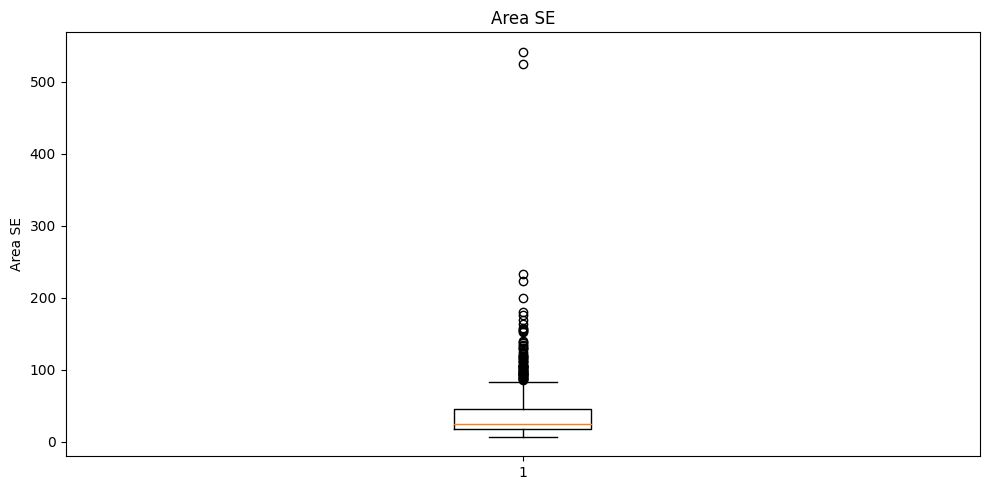

Variable Num Outliers
--------------------------------
Area SE 65        


In [ ]:

plt.figure(figsize=(10, 5))

# Gráfico de caja para 'area_se'
plt.subplot(1, 1, 1)
plt.boxplot(df["area_se"].dropna())
plt.title('Area SE')
plt.ylabel('Area SE')

# Ajuste automático del layout y mostrar gráfico
plt.tight_layout()
plt.show()

# Cálculo del primer y tercer cuartil para 'area_se'
Q1_area_se = df['area_se'].quantile(0.25)
Q3_area_se = df['area_se'].quantile(0.75)

# Rango intercuartílico para 'area_se'
IQR_area_se = Q3_area_se - Q1_area_se

# Detección de outliers para 'area_se'
outliers_area_se = df[(df['area_se'] < (Q1_area_se - 1.5 * IQR_area_se)) | (df['area_se'] > (Q3_area_se + 1.5 * IQR_area_se))]

# Obtención de la cantidad de outliers para 'area_se'
num_outliers_area_se = outliers_area_se.shape[0]

# Impresión de resultados para 'area_se'
print(f"{'Variable'} {'Num Outliers'}")
print(f"{'--------------------------------'}")
print(f"{'Area SE'} {num_outliers_area_se:<10}")

A partir del análisis de la gráfica de bigotes, observamos que existen dos valores extremadamente distantes. Por esta razón, optaremos por eliminar estos dos valores atípicos, mientras que conservaremos el resto de los outliers, dado que forman un grupo numeroso y compacto. Además, la variable "area_se" representa el error estándar del área del tumor, proporcionando una estimación de la variabilidad que se podría esperar en el promedio de áreas del tumor de varias muestras, ya sea del mismo paciente o de pacientes similares.

In [ ]:
Q1_area_se = df['area_se'].quantile(0.25)
Q3_area_se = df['area_se'].quantile(0.75)

IQR_area_se = Q3_area_se - Q1_area_se

outliers_area_se = df[(df['area_se'] < (Q1_area_se - 10 * IQR_area_se)) | (df['area_se'] > (Q3_area_se + 10 * IQR_area_se))]
num_outliers_area_se = outliers_area_se.shape[0]

print(f"{'Variable'} {'Num Outliers'}")
print(f"{'--------------------------------'}")
print(f"{'Area SE'} {num_outliers_area_se:<10}")

#Eliminamos los outliers
outliers_indices = outliers_area_se.index
df = df.drop(outliers_indices)

Variable Num Outliers
--------------------------------
Area SE 2         


Continuamos con el preprocesamiento de los datos al examinar la distribución de la variable de respuesta, es decir, las etiquetas que clasifican los tumores como malignos o benignos. Es crucial asegurarse de que ambas clases estén distribuidas de manera equitativa para evitar la creación de un clasificador con sesgo hacia alguna de las categorías.

In [ ]:
df.diagnosis.value_counts()

px.histogram(df, x='diagnosis')

Utilizaremos la técnica SMOTE (Synthetic Minority Over-sampling Technique) para equilibrar las clases, la cual es un método de sobremuestreo que incrementa el volumen de datos en las clases menos representadas.

Como resultado, se logra un equilibrio de clases mediante la creación de datos sintéticos que se asemejan a los datos originales.

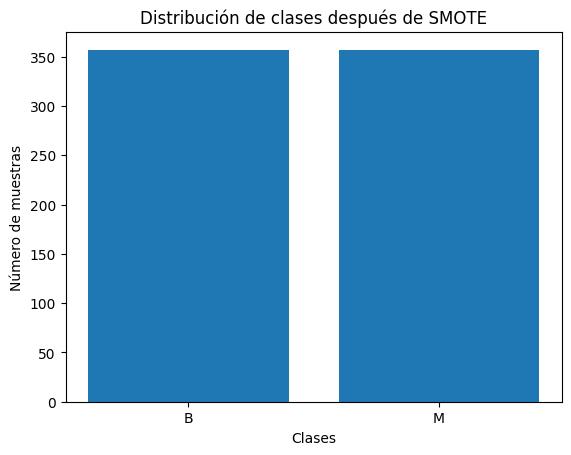

In [ ]:
y = df['diagnosis']
X = df.drop(['diagnosis'], axis=1)

smote = SMOTE()

# Ajustar SMOTE al conjunto de entrenamiento
X_train_smote, y_train_smote = smote.fit_resample(X, y)

# Contamos las instancias por clase
unique, counts = np.unique(y_train_smote, return_counts=True)
class_counts = dict(zip(unique, counts))

# Creamos el gráfico de barras
plt.bar(class_counts.keys(), class_counts.values())

plt.title('Distribución de clases después de SMOTE')
plt.xlabel('Clases')
plt.ylabel('Número de muestras')
plt.xticks(list(class_counts.keys()))
plt.show()

X = X_train_smote
y = y_train_smote

Procederemos a descartar aquellas características que presenten dependencia con otras. Para ello, generaremos una matriz de correlación y excluiremos aquellas características que exhiban una correlación superior a 0.9.

In [ ]:
#Matriz de correlación
correlation_matrix = X.corr().abs()

#Tomamos solo la parte superior de la matriz
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool_))

columns_to_drop = set()
highly_correlated_pairs = []

# Iterar sobre los elementos de upper_tri para encontrar los pares de columnas correlacionadas
for i, row in enumerate(upper_tri.index):
    for j, col in enumerate(upper_tri.columns):
        if upper_tri.iat[i, j] > 0.90 and i < j: # Asegurar que i < j para no repetir pares
            # Agregar el par y la correlación a la lista de pares altamente correlacionados
            highly_correlated_pairs.append((row, col, upper_tri.iat[i, j]))
            columns_to_drop.add(row)

# Imprimir los pares de columnas con alta correlación antes de eliminarlos
print("Pares de columnas con alta correlación mayor a 0.90:\n")
for pair in highly_correlated_pairs:
    print(f"{pair[0]} y {pair[1]} con una correlación de {pair[2]:.2f}")

# Convertir el conjunto a una lista para poder eliminar las columnas del DataFrame
columns_to_drop = list(columns_to_drop)

# Imprimir las columnas que se van a eliminar
print("\nColumnas a eliminar para evitar redundancia:")
print(columns_to_drop)

# Eliminar las columnas del DataFrame
df.drop(columns=columns_to_drop, inplace=True)

Pares de columnas con alta correlación mayor a 0.90:

radius_mean y perimeter_mean con una correlación de 1.00
radius_mean y area_mean con una correlación de 0.99
radius_mean y radius_worst con una correlación de 0.97
radius_mean y perimeter_worst con una correlación de 0.97
radius_mean y area_worst con una correlación de 0.95
texture_mean y texture_worst con una correlación de 0.91
perimeter_mean y area_mean con una correlación de 0.99
perimeter_mean y radius_worst con una correlación de 0.97
perimeter_mean y perimeter_worst con una correlación de 0.97
perimeter_mean y area_worst con una correlación de 0.94
area_mean y radius_worst con una correlación de 0.97
area_mean y perimeter_worst con una correlación de 0.96
area_mean y area_worst con una correlación de 0.96
concavity_mean y concave points_mean con una correlación de 0.93
concave points_mean y concave points_worst con una correlación de 0.92
radius_se y perimeter_se con una correlación de 0.97
radius_se y area_se con una correla

Tras realizar un análisis de correlación, identificamos un total de 21 pares de variables con una correlación significativa (mayor al 90%). A partir de estos pares correlacionados, hemos tomado la decisión de remover las siguientes variables: 'radius_mean', 'texture_mean', 'area_mean', 'perimeter_mean', 'radius_worst', 'radius_se', 'perimeter_se', 'perimeter_worst', 'concavity_mean' y 'concave points_mean', debido a su alta interdependencia con otras variables. Esta eliminación estratégica nos permite reducir la redundancia y mejorar la precisión y generalización de nuestro modelo de clasificación.

Proseguimos con el procesamiento previo de los datos mediante la conversión a categorías de los valores de las variables 'area_worst', 'compactness_mean', 'compactness_worst' y 'compactness_se', clasificándolos en tres etiquetas distintas (1, 2, 3). Este agrupamiento categoriza los datos en tres niveles. Se comprueba el cambio mediante el .head() que muestra los primeros 5 valores de cada una de las variables seleccionadas.

In [ ]:
df['area_worst'] = pd.cut(df['area_worst'], bins=3, labels=[1, 2, 3])

df['compactness_mean'] = pd.cut(df['compactness_mean'], bins=3, labels=[1, 2, 3])

df['compactness_worst'] = pd.cut(df['compactness_worst'], bins=3, labels=[1, 2, 3])

df['compactness_se'] = pd.cut(df['compactness_se'], bins=3, labels=[1, 2, 3])

print(df[['area_worst', 'compactness_mean','compactness_worst', 'compactness_se' ]].head())

  area_worst compactness_mean compactness_worst compactness_se
0          2                3                 2              2
1          2                1                 1              1
2          2                2                 2              1
3          1                3                 3              2
4          2                2                 1              1


Reservamos cinco muestras del conjunto de datos para evaluar la efectividad del clasificador una vez completado el entrenamiento.

In [ ]:
registros_seleccionados = df.sample(n=5)

df = df.drop(registros_seleccionados.index)

registros_seleccionados_test = registros_seleccionados[[ 'diagnosis']]

registros_seleccionados = registros_seleccionados.drop(['diagnosis'], axis=1)

**2) Crea los distintos clasificadores en el que utilices al menos dos criterios de división distintos o medidas de desorden. Calcula el error en cada uno de ellos y elige el qué mejor clasifique. (0,5 puntos)**

In [ ]:
y = df['diagnosis'] #Variable respuesta (etiquetas)
X = df.drop(['diagnosis'], axis=1) #(Características)

# Clasificador basado en reglas con criterio de entropía (ID3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(X_train, y_train)
y_pred_entropy = clf_entropy.predict(X_test)
error_entropy = 1 - accuracy_score(y_test, y_pred_entropy)

# Clasificador basado en reglas con criterio de Gini

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf_gini = DecisionTreeClassifier(criterion='gini')
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)
error_gini = 1 - accuracy_score(y_test, y_pred_gini)

#Errores
print(f"Error de clasificador ID3 (entropía): {error_entropy}")
print(f"Error de clasificador Gini: {error_gini}")

comparador = [('ID3', error_entropy), ('GINI', error_gini)]
mejor = min(comparador, key=lambda x: x[1])
print(f"El mejor clasificador es {mejor[0]} con un error de: {mejor[1]}")

Error de clasificador ID3 (entropía): 0.10619469026548678
Error de clasificador Gini: 0.09734513274336287
El mejor clasificador es GINI con un error de: 0.09734513274336287


El clasificador ID3 combina el algoritmo de Hunt con el cálculo de la entropía para la selección de atributos. Elige la mejor partición evaluando la ganancia de información, que se mide como la diferencia entre la entropía y la efectiidad. El atributo que presenta la mayor ganancia de información (diferencia entre entropía y efectividad) es seleccionado para dividir el conjunto de datos.

En el caso del índice de Gini, se calcula utilizando la fórmula $Gini(t) = 1 - \sum_{j} p_j^2 $, donde $ p_j $ es la probabilidad de la clase $ j$ en el nodo $t$. El atributo que resulta en el valor más bajo de Gini es escogido para realizar la partición.

De acuerdo a los datos disponibles, el clasificador basado en el índice de Gini ha demostrado ser más preciso, con un error mínimo del 5.3%.

**3) Dibuja los modelos elegidos en el punto anterior. (0,5 puntos)**

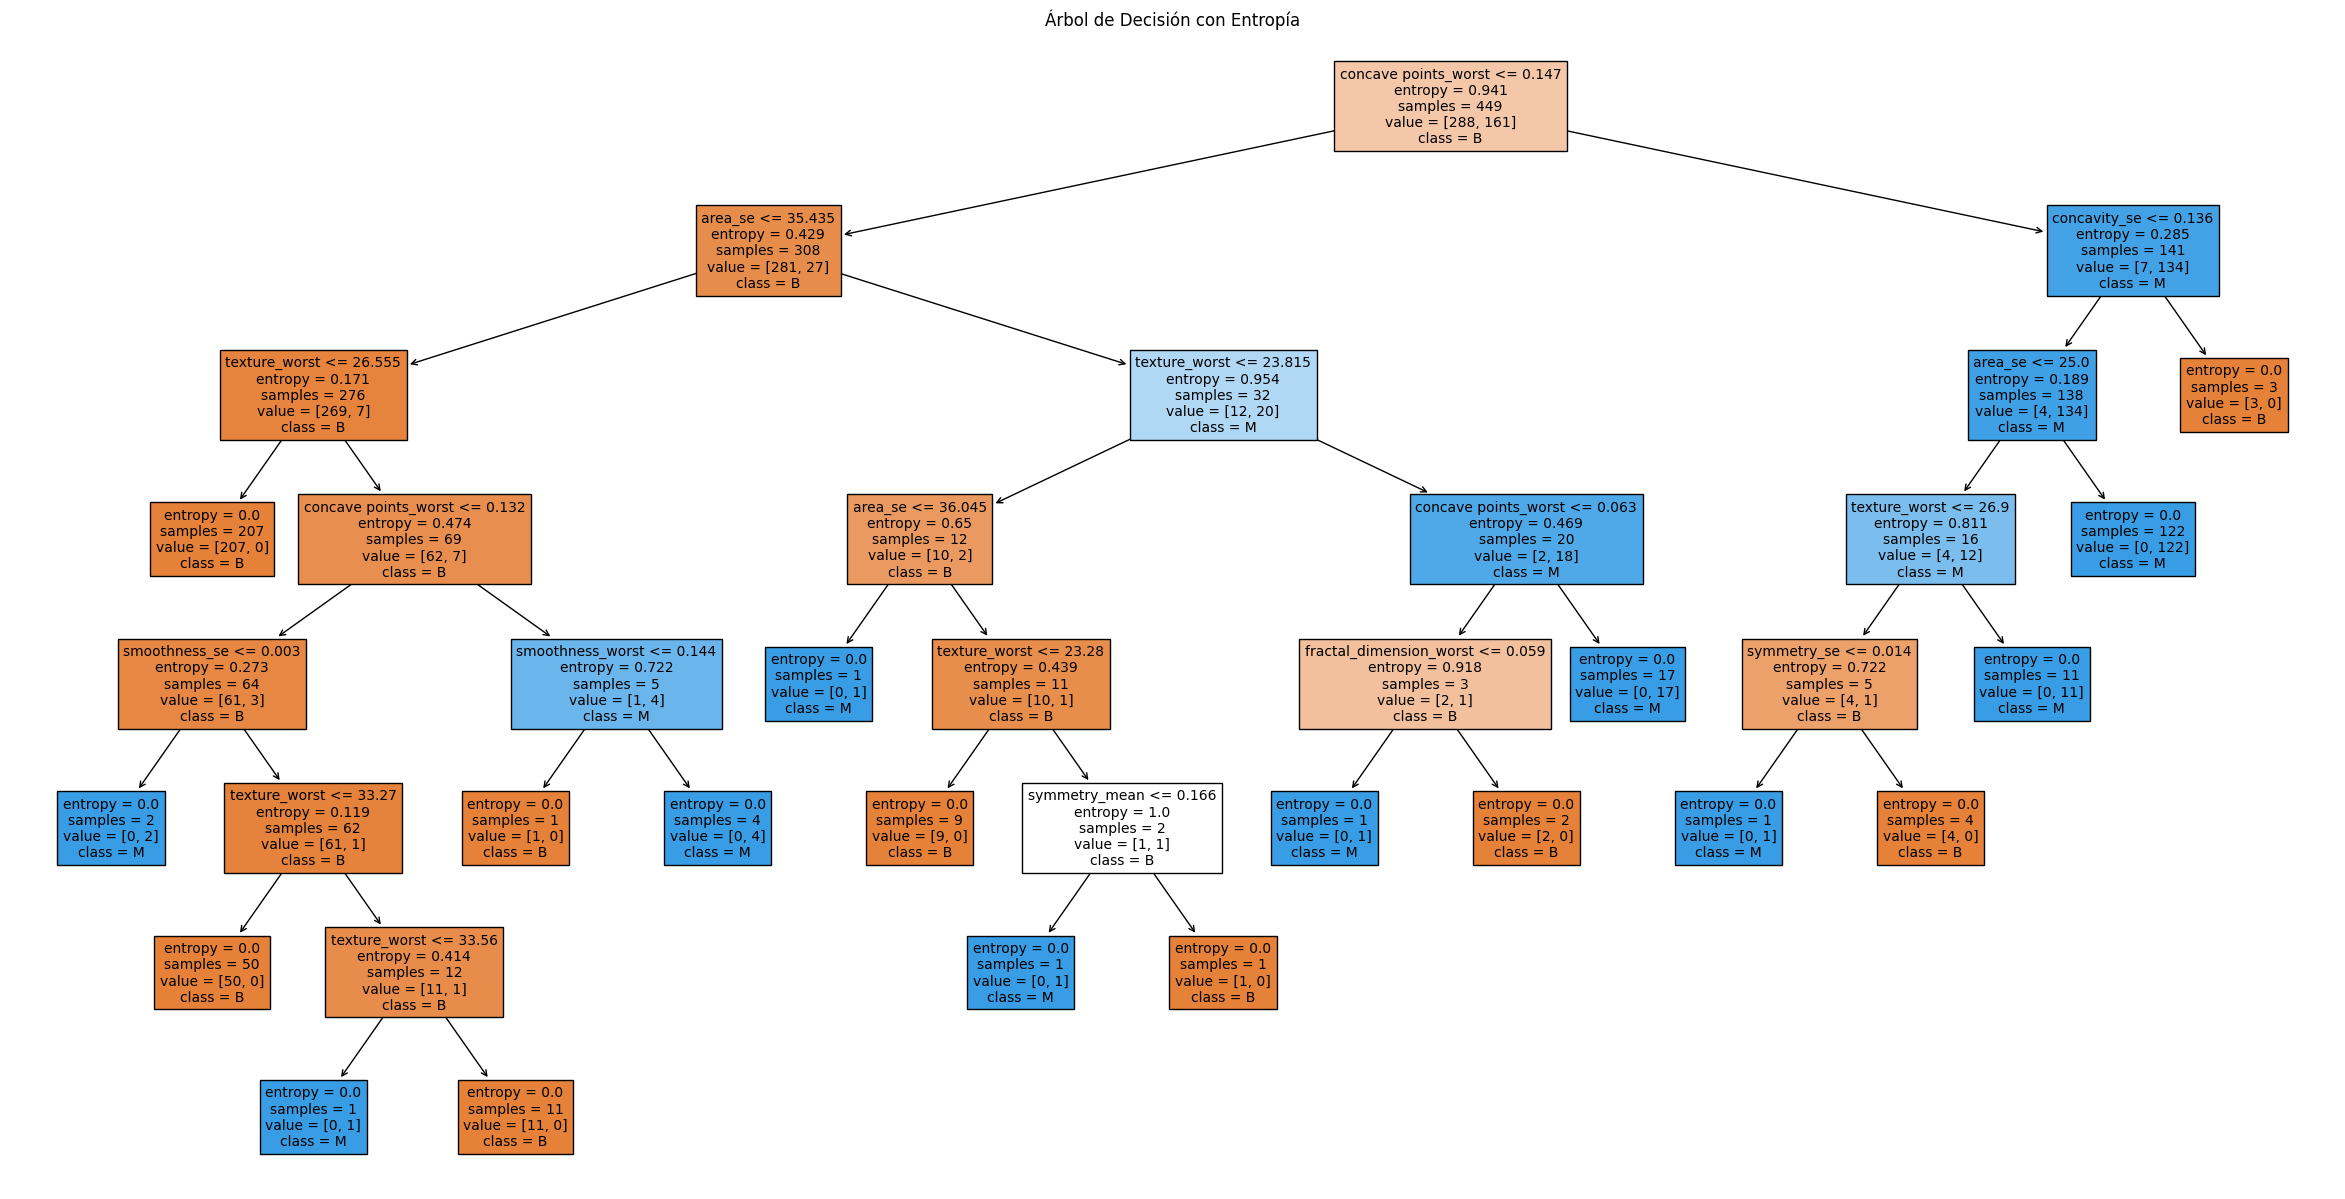

In [ ]:
plt.figure(figsize=(30,15))
plot_tree(clf_entropy, filled=True, feature_names=X.columns, class_names=['B', 'M'], fontsize=10)
plt.title('Árbol de Decisión con Entropía')
plt.show()


Utilizando el clasificador ID3, se ha construido un árbol de decisión que ha derivado en la creación de 15 reglas distintas. Estas reglas se aplicarán para determinar si los datos corresponden a una clasificación de tumores como benignos o malignos.

El árbol comienza con una primera partición basada en el atributo 'area_se'. Aquí, se bifurca el conjunto de datos en dos ramas: una rama derecha que incluye aquellos casos donde 'area_se' excede el valor de 35.43, y una rama izquierda para casos en los que 'area_se' es menor a 24.89.

A partir de estas ramificaciones iniciales, se evalúa la ganancia de información en cada segmento para determinar qué atributo adicional proporciona la mayor ganancia. Este proceso se repite iterativamente hasta generar reglass.

Cada rama continua subdividiéndose hasta que se alcanza una condición que permite formular una regla de clasificación definitiva. Esto puede ser cuando se llega a un nodo con ejemplos de una sola clase, cuando no quedan atributos para dividir o cuando la división no aporta más información.

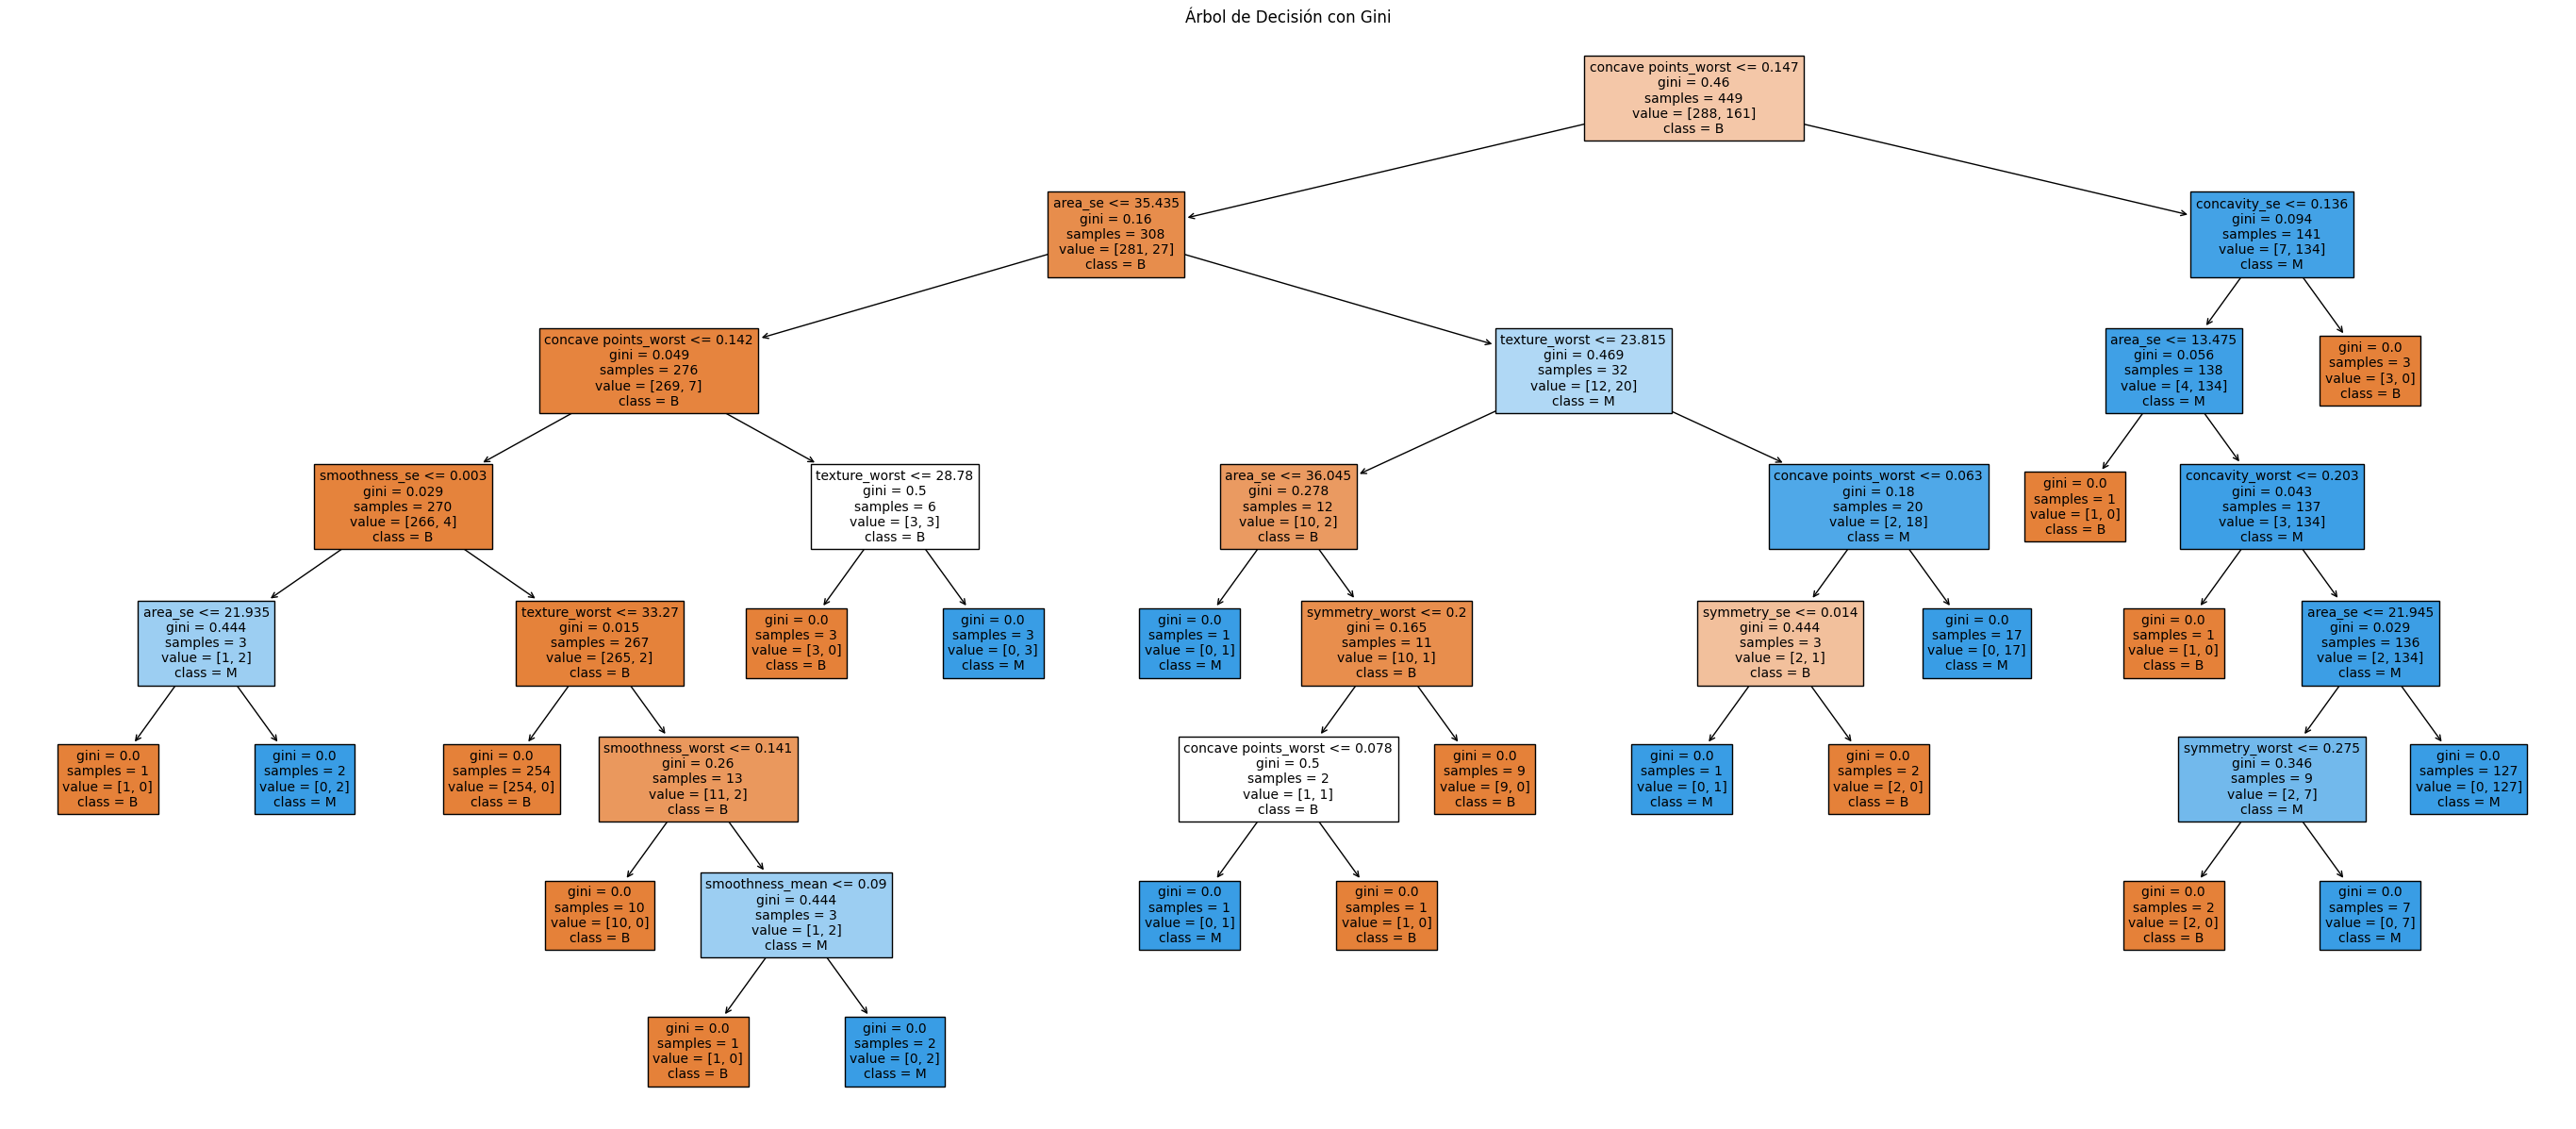

In [ ]:
plt.figure(figsize=(35,15))
plot_tree(clf_gini, filled=True, feature_names=X.columns, class_names=['B', 'M'], fontsize=10)
plt.title('Árbol de Decisión con Gini')
plt.show()

Utilizando el clasificador basado en el índice de Gini, hemos desarrollado un árbol de decisión que consta de 18 reglas específicas. Este clasificador inicia su proceso de decisión con el atributo 'area_se', aplicando puntos de corte diferentes para las bifurcaciones: hacia la derecha se agrupan los casos con valores mayores a 35.43, y hacia la izquierda aquellos con valores menores a 0.1306, pero esta selección inicial se restringe únicamente a los datos que registran un valor en 'concave point worst' inferior a 0.142.

Después de la primera división, se calcula el índice de Gini para cada una de las particiones resultantes. Este cálculo ayuda a identificar el atributo que más eficazmente divide el conjunto de datos, maximizando la pureza de las clases en las particiones subsiguientes. El atributo seleccionado en cada paso es el que logra el valor más bajo de Gini, indicando la mejor capacidad de discriminación para esa partición del conjunto de datos.

**4) Selecciona dos reglas que sean las que generalicen lo menos posible y otras dos que especialicen
lo menos posible. Interprétalas. Si la estructura obtenida para sacar las reglas es demasiado
grande repite el proceso para un 10% de los datos. (0,5 puntos)**




In [ ]:
tree_rules = export_text(clf_gini, feature_names=list(X.columns))

# Dividir las reglas en líneas para analizarlas
rules = tree_rules.splitlines()

general_rules = []
specific_rules = []

#Para calcular la profundidad de la regla
def calculate_depth(rule):
    return rule.count('|   ')

for rule in rules:
    if 'class' in rule:
        depth = calculate_depth(rule)

        # Asumir que las reglas en la raíz o a un nivel de profundidad son generales
        if depth <= 3:
            general_rules.append(rule)
        # Asumir que las reglas con una profundidad mayor son más específicas
        else:
            specific_rules.append(rule)

# Ordenar las reglas de menor a mayor profundidad para generalidad y viceversa para especificidad
general_rules.sort(key=calculate_depth)
specific_rules.sort(key=calculate_depth, reverse=True)

# Seleccionar las dos reglas más generales y las dos más específicas
two_most_general_rules = general_rules[:2]
two_most_specific_rules = specific_rules[:2]

# Imprimir las reglas seleccionadas
print("Dos reglas que generalizan más:")
for rule in two_most_general_rules:
    print(rule)

print("\nDos reglas que especializan más:")
for rule in two_most_specific_rules:
    print(rule)

Dos reglas que generalizan más:
|   |   |--- class: B
|   |   |   |--- class: B

Dos reglas que especializan más:
|   |   |   |   |   |   |   |--- class: B
|   |   |   |   |   |   |   |--- class: M


 Las reglas más especializadas tienden a tener un camino largo desde la raíz hasta la hoja y se aplican a un número pequeño de muestras, mientras que las reglas que generalizan más tienen caminos más cortos y se aplican a un mayor número de muestras.

 **Las reglas que generalizan más (especializan menos) son:**

1. Regla con profundidad de 3, que cumple con las siguientes especificaciones:


*   Concativity_se > 0.135
*   Concave points_worst > 0.142
*   gini = 0.0 -> La regla es pura, los datos pertenecen a una sola clase
*   samples = 3 -> Cantidad de muestras en el nodo
*   value = [3, 0] -> Las tres muestras pertenecen a la clase Beningno
*   class = B (Beningno)

2. Regla con profundidad 4, que cumple con las siguientes especificaciones:

*   Concativity_worst > 0.252
*   Concave points_worst <= 0.142
*   area_se > 35.435
*   gini = 0.0 -> La regla es pura, los datos pertenecen a una sola clase
*   samples = 11 -> Cantidad de muestras en el nodo
*   value = [0, 11] -> Las 11 muestras pertenecen a la clase Maligno
*   class = M (Maligno)


**Las reglas que especializan más (generalizan menos) son:**

1. Regla con profundidad de 8, que cumple con las siguientes especificaciones:


*   area_se <= 35.435
*   Concave points_worst <= 0.142
*   Smoothness_se > 0.003
*   texture_se > 0.38
*   Concave_points_worst <= 0.132
*   Texture_worst: [33.27 , 33.56]
*   gini = 0.0 -> La regla es pura, los datos pertenecen a una sola clase
*   samples = 1 -> Cantidad de muestras en el nodo
*   value = [0, 1] -> La muestra pertenece a la clase Maligno
*   class = M (Maligno)

2. Regla con profundidad 4, que cumple con las siguientes especificaciones:

*   area_se <= 35.435
*   Concave points_worst <= 0.142
*   Smoothness_se > 0.003
*   texture_se > 0.38
*   Concave_points_worst <= 0.132
*   Texture_worst > 33.56
*   gini = 0.0 -> La regla es pura, los datos pertenecen a una sola clase
*   samples = 1 -> Cantidad de muestras en el nodo
*   value = [0, 1] -> La muestra pertenece a la clase Maligno
*   class = M (Maligno)


**5) Usa tu clasificador para clasificar a 5 individuos que no se hayan usado en los pasos anteriores.
Dichos individuos deberán presentar diferentes situaciones. (1 punto)**

In [ ]:
predicted_classes = clf_gini.predict(registros_seleccionados)

# Imprimir los resultados
for i, individual in enumerate(registros_seleccionados.index):
    print(f"Individuo {i+1}:")
    print(f"Clase predicha: {predicted_classes[i]}")
    print(f"Clase real: {registros_seleccionados_test.iloc[i]['diagnosis']}\n")


Individuo 1:
Clase predicha: M
Clase real: M

Individuo 2:
Clase predicha: B
Clase real: B

Individuo 3:
Clase predicha: B
Clase real: M

Individuo 4:
Clase predicha: B
Clase real: B

Individuo 5:
Clase predicha: M
Clase real: M



Finalizamos nuestro análisis poniendo a prueba nuestro clasificador sobre los cinco registros que se habían apartado con antelación. Para esta evaluación, empleamos el modelo que fue previamente entrenado y generamos predicciones para estos cinco individuos, que no habían sido incluidos en el proceso de entrenamiento del modelo.

De los resultados obtenidos, constatamos que el clasificador logró identificar con exactitud 4 de las 5 clases. Este tipo de prueba es crucial para obtener una estimación preliminar de cómo el clasificador podría desempeñarse en situaciones del mundo real, donde es probable que se encuentre con datos que no ha procesado previamente.

No obstante, es importante considerar que la prueba con solo cinco registros no es suficiente para concluir la eficacia general del modelo.

# **Práctica 2**

TCGA (The Cancer Genome Atlas) es un proyecto colaborativo dirigido por el Instituto Nacional del Cáncer
(NCI) y el Instituto Nacional de Investigación del Genoma Humano (NHGRI) en los Estados Unidos. Su objetivo
principal es caracterizar exhaustivamente las alteraciones genómicas en el cáncer mediante el análisis de
grandes conjuntos de datos de pacientes con cáncer. Se pretende crear un clasificador de cáncer que tenga
en cuenta las probabilidades de pertenecer a una clase dependiendo de las distintas variables y sus valores.
Usa scikit-learn junto con las librerías que necesites para resolver las siguientes cuestiones.

----


Este ejercicio de la práctica se enfoca principalmente en el desarrollo de un modelo clasificador utilizando el conjunto de datos de TCGA. Trataremos las etapas claves de preprocesamiento de datos y aplicaremos técnicas avanzadas para crear un clasificador con la mayor preción posible de cáncer. Finalmente, validaremos el modelo con casos reales, demostrando su capacidad predictiva y la importancia de la precisión en la clasificación de datos genómicos.

**1) Realiza todo el preprocesamiento necesario para poder entrenar el clasificador con datos
categóricos (en el caso de transformaciones de datos continuos se usarán los cuartiles creados por el diagrama de tallos y hojas). Muestra las distintas tablas de distribución.**

In [21]:
# Cargar los datos del archivo CSV
file_path = 'TCGA.csv'
data = pd.read_csv(file_path)

# Obtener las dimensiones del DataFrame
dimensiones = data.shape

# Imprimir las dimensiones
print(f"La base de datos tiene {dimensiones[0]} filas y {dimensiones[1]} columnas.")

# Mostrar las primeras filas del conjunto de datos para entender su estructura
data.head()

La base de datos tiene 862 filas y 27 columnas.


Grade   Project       Case_ID  Gender   Age_at_diagnosis  \
0   LGG  TCGA-LGG  TCGA-DU-8164    Male  51 years 108 days   
1   LGG  TCGA-LGG  TCGA-QH-A6CY    Male  38 years 261 days   
2   LGG  TCGA-LGG  TCGA-HW-A5KM    Male   35 years 62 days   
3   LGG  TCGA-LGG  TCGA-E1-A7YE  Female  32 years 283 days   
4   LGG  TCGA-LGG  TCGA-S9-A6WG    Male  31 years 187 days   

         Primary_Diagnosis   Race     IDH1         TP53         ATRX  ...  \
0   Oligodendroglioma, NOS  white  MUTATED  NOT_MUTATED  NOT_MUTATED  ...   
1             Mixed glioma  white  MUTATED  NOT_MUTATED  NOT_MUTATED  ...   
2         Astrocytoma, NOS  white  MUTATED      MUTATED      MUTATED  ...   
3  Astrocytoma, anaplastic  white  MUTATED      MUTATED      MUTATED  ...   
4  Astrocytoma, anaplastic  white  MUTATED      MUTATED      MUTATED  ...   

         FUBP1          RB1       NOTCH1         BCOR        CSMD3  \
0      MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED   
1  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED   
2  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED   
3  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED   
4  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED   

       SMARCA4       GRIN2A         IDH2         FAT4       PDGFRA  
0  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  
1  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  
2  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  
3  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED      MUTATED  NOT_MUTATED  
4  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  

[5 rows x 27 columns]

Comenzamos el ejercicio con una exploración detallada de la base de datos, que como podemos apreciar, está compuesta por 862 registros y 27 variables, centrada en casos individuales de cáncer. Entre las variables de la base de datos, destacamos:

- **Grade:** grado clínico del tumor.

- **Gender:** refleja el género del paciente.

- **Age_at_diagnosis:** edad en el momento del diagnóstico.

- **Primary_diagnosis:**  tipo de cáncer diagnosticado.

- **Race:** categoriza la raza del paciente.

- **Diferentes genes:** estos son marcadores genéticos que se consideran en el estudio para identificar mutaciones relacionadas con diferentes tipos de cáncer.

Una vez comprendida la base de datos al completo, necesitamos prepararla para poder entrenar el clasificador. Para ello, debemos depurarla para que la calidad de los datos sea la mejor posible:

In [22]:
# TRANSFORMACIONES.

# Reemplazamos "--" por valores NaN y eliminamos filas con cualquier valor NaN.
data = data.replace("--", pd.NA).dropna()


# Pasamos años a numero continuo.
def edad_a_decimal(age_string):
    try:
        # Verificamos si la cadena contiene 'years' para determinar si se debe procesar tanto años como días.
        if 'years' in age_string:

            # Dividimos la cadena en la parte de los años y la parte de los días.
            partes = age_string.split(' years ')
            years = int(partes[0])  # Convertimos la parte de los años a entero.

            # Convertimos la parte de los días a entero si es posible, si no, usamos 0.
            days = int(partes[1].split(' days')[0]) if len(partes) > 1 else 0

        else:

            # Si la cadena no contiene 'years', asumimos que es un número entero de años.
            years = int(age_string)
            days = 0

        # Convertimos los días a una fracción de año y la sumamos a los años para obtener el valor decimal.
        return years + days / 365.0

    except ValueError as e:

        return None

# Aplicamos la función.
data['Age_at_diagnosis'] = data['Age_at_diagnosis'].apply(edad_a_decimal)

# Eliminamos posibles NaN.
data = data.dropna(subset=['Age_at_diagnosis'])


# Eliminamos las columnas case_id y project (no necesarias)
data = data.drop(['Project', 'Case_ID'], axis=1)


# Eliminar las razas no determinadas.
data = data[data['Race'] != 'not reported']


# Reemplazamos 'MUTATED' por 1 y 'NOT_MUTATED' por 0 en todas las columnas de genes.
columns_to_replace = data.columns[5:]

for column in columns_to_replace:
    data[column] = data[column].replace({'MUTATED': 1, 'NOT_MUTATED': 0})


# Obtener las dimensiones del DataFrame
dimensiones = data.shape

# Imprimir las dimensiones
print(f"La base de datos tiene {dimensiones[0]} filas y {dimensiones[1]} columnas.")

# Verificar los cambios
data.head()

La base de datos tiene 837 filas y 25 columnas.


Grade  Gender  Age_at_diagnosis        Primary_Diagnosis   Race  IDH1  TP53  \
0   LGG    Male         51.295890   Oligodendroglioma, NOS  white     1     0   
1   LGG    Male         38.715068             Mixed glioma  white     1     0   
2   LGG    Male         35.169863         Astrocytoma, NOS  white     1     1   
3   LGG  Female         32.775342  Astrocytoma, anaplastic  white     1     1   
4   LGG    Male         31.512329  Astrocytoma, anaplastic  white     1     1   

   ATRX  PTEN  EGFR  ...  FUBP1  RB1  NOTCH1  BCOR  CSMD3  SMARCA4  GRIN2A  \
0     0     0     0  ...      1    0       0     0      0        0       0   
1     0     0     0  ...      0    0       0     0      0        0       0   
2     1     0     0  ...      0    0       0     0      0        0       0   
3     1     0     0  ...      0    0       0     0      0        0       0   
4     1     0     0  ...      0    0       0     0      0        0       0   

   IDH2  FAT4  PDGFRA  
0     0     0       0  
1     0     0       0  
2     0     0       0  
3     0     1       0  
4     0     0       0  

[5 rows x 25 columns]

Como ya se ha mencionado, se han realizado varias modificaciones para garantizar la integridad y la utilidad del conjunto de datos a la hora de crear el clasificador. Entre ellas se encuentran:

- **Limpieza Inicial:** Se sustituyeron los valores "--", que presumiblemente indican datos no reportados, con NaN para una gestión mas fácil de los valores faltantes. Posteriormente, se procedió a eliminar cualquier fila que tuviera valores NaN.

- **Estandarización de la Edad:** Para la variable 'Age_at_diagnosis', que originalmente contenía cadenas de texto con años y días, se implementó una función 'edad_a_decimal' que convierte estas cadenas en un número decimal.

- **Eliminación de Variables Redundantes:** Se identificaron y eliminaron las columnas 'case_id' y 'project' por ser innecesarias para el análisis posterior, lo que reduce la dimensión del conjunto de datos y mejora la eficiencia computacional.

- **Unificación de Datos Raciales:** Se eliminaron registros donde la raza no estaba reportada, lo que ayuda a evitar sesgos en el análisis relacionados con datos incompletos de la raza del paciente.

- **Codificación de Variables Categóricas:** Para las variables genéticas, se reemplazaron las etiquetas 'MUTATED' y 'NOT_MUTATED' por 1 y 0, respectivamente. Esto convierte los atributos categóricos en numéricos para que puedan ser procesados por algoritmos de aprendizaje automático que requieren datos numéricos.

Finalmente la base de datos termina teniendo unas dimensiones de 25 variables con 837 observaciones. Tras las modificaciones, el dataframe ya está listo para ser empleado a la hora de crear el clasificador.

Antes de nada, vamos a terminar de entender bien la base de datos ya limpia lo cual nos ayudará a afinar la precisión de nuestro clasificador. Para ello, crearemos la matriz de correlación para ver la relación entre las variables, entenderemos el comportamiento de las variables gracias a imprimir sus distribuciones y nos fijaremos más detalladamente en la variable numérica 'age_at_diagnosis'.

**DIAGRAMA DE HOJAS Y TALLOS (Age_at_diagnosis)**.

Un diagrama de tallos y hojas ofrece una visualización inmediata y detallada de la distribución de los datos representados, permitiéndote identificar rápidamente la forma, la centralidad y la dispersión. Es esencial para comprender la naturaleza de los datos con los que trabajas y prepararte para análisis más avanzados. En esta caso, representamos la variable de la cual obtendremos más información gracias al diagrama creado y a los cuartiles creados.


Primer cuartil (Q1): 38.035616438356165
Segundo cuartil (Mediana, Q2): 51.47123287671233
Tercer cuartil (Q3): 62.64383561643836


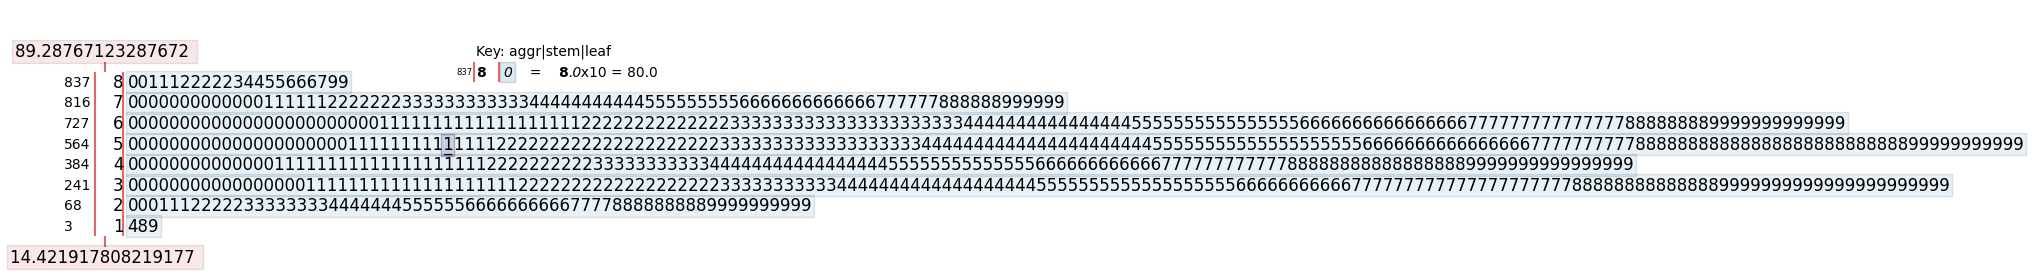

In [23]:
# Diagrama de hojas y tallos.

age_descriptive = data['Age_at_diagnosis']
age_descriptive_stats = age_descriptive.describe()
age_descriptive_stats

stemgraphic.stem_graphic(age_descriptive, scale=10)

Q1 = data['Age_at_diagnosis'].quantile(0.25)
Q2 = data['Age_at_diagnosis'].quantile(0.5)  # mediana
Q3 = data['Age_at_diagnosis'].quantile(0.75)

print(f"Primer cuartil (Q1): {Q1}")
print(f"Segundo cuartil (Mediana, Q2): {Q2}")
print(f"Tercer cuartil (Q3): {Q3}")

**REPRESENTACIÓN DE LAS DISTRIBUCIONES**

Representar gráficamente la distribución de las variables es clave para identificar patrones, valores atípicos y errores en los datos. Nos facilita la comprensión del comportamiento de los datos así como nos ayuda a verificar supuestos estadísticos además de mejorar la comunicación de resultados. Este proceso es muy importante para tomar decisiones informadas en el análisis y modelado de datos.

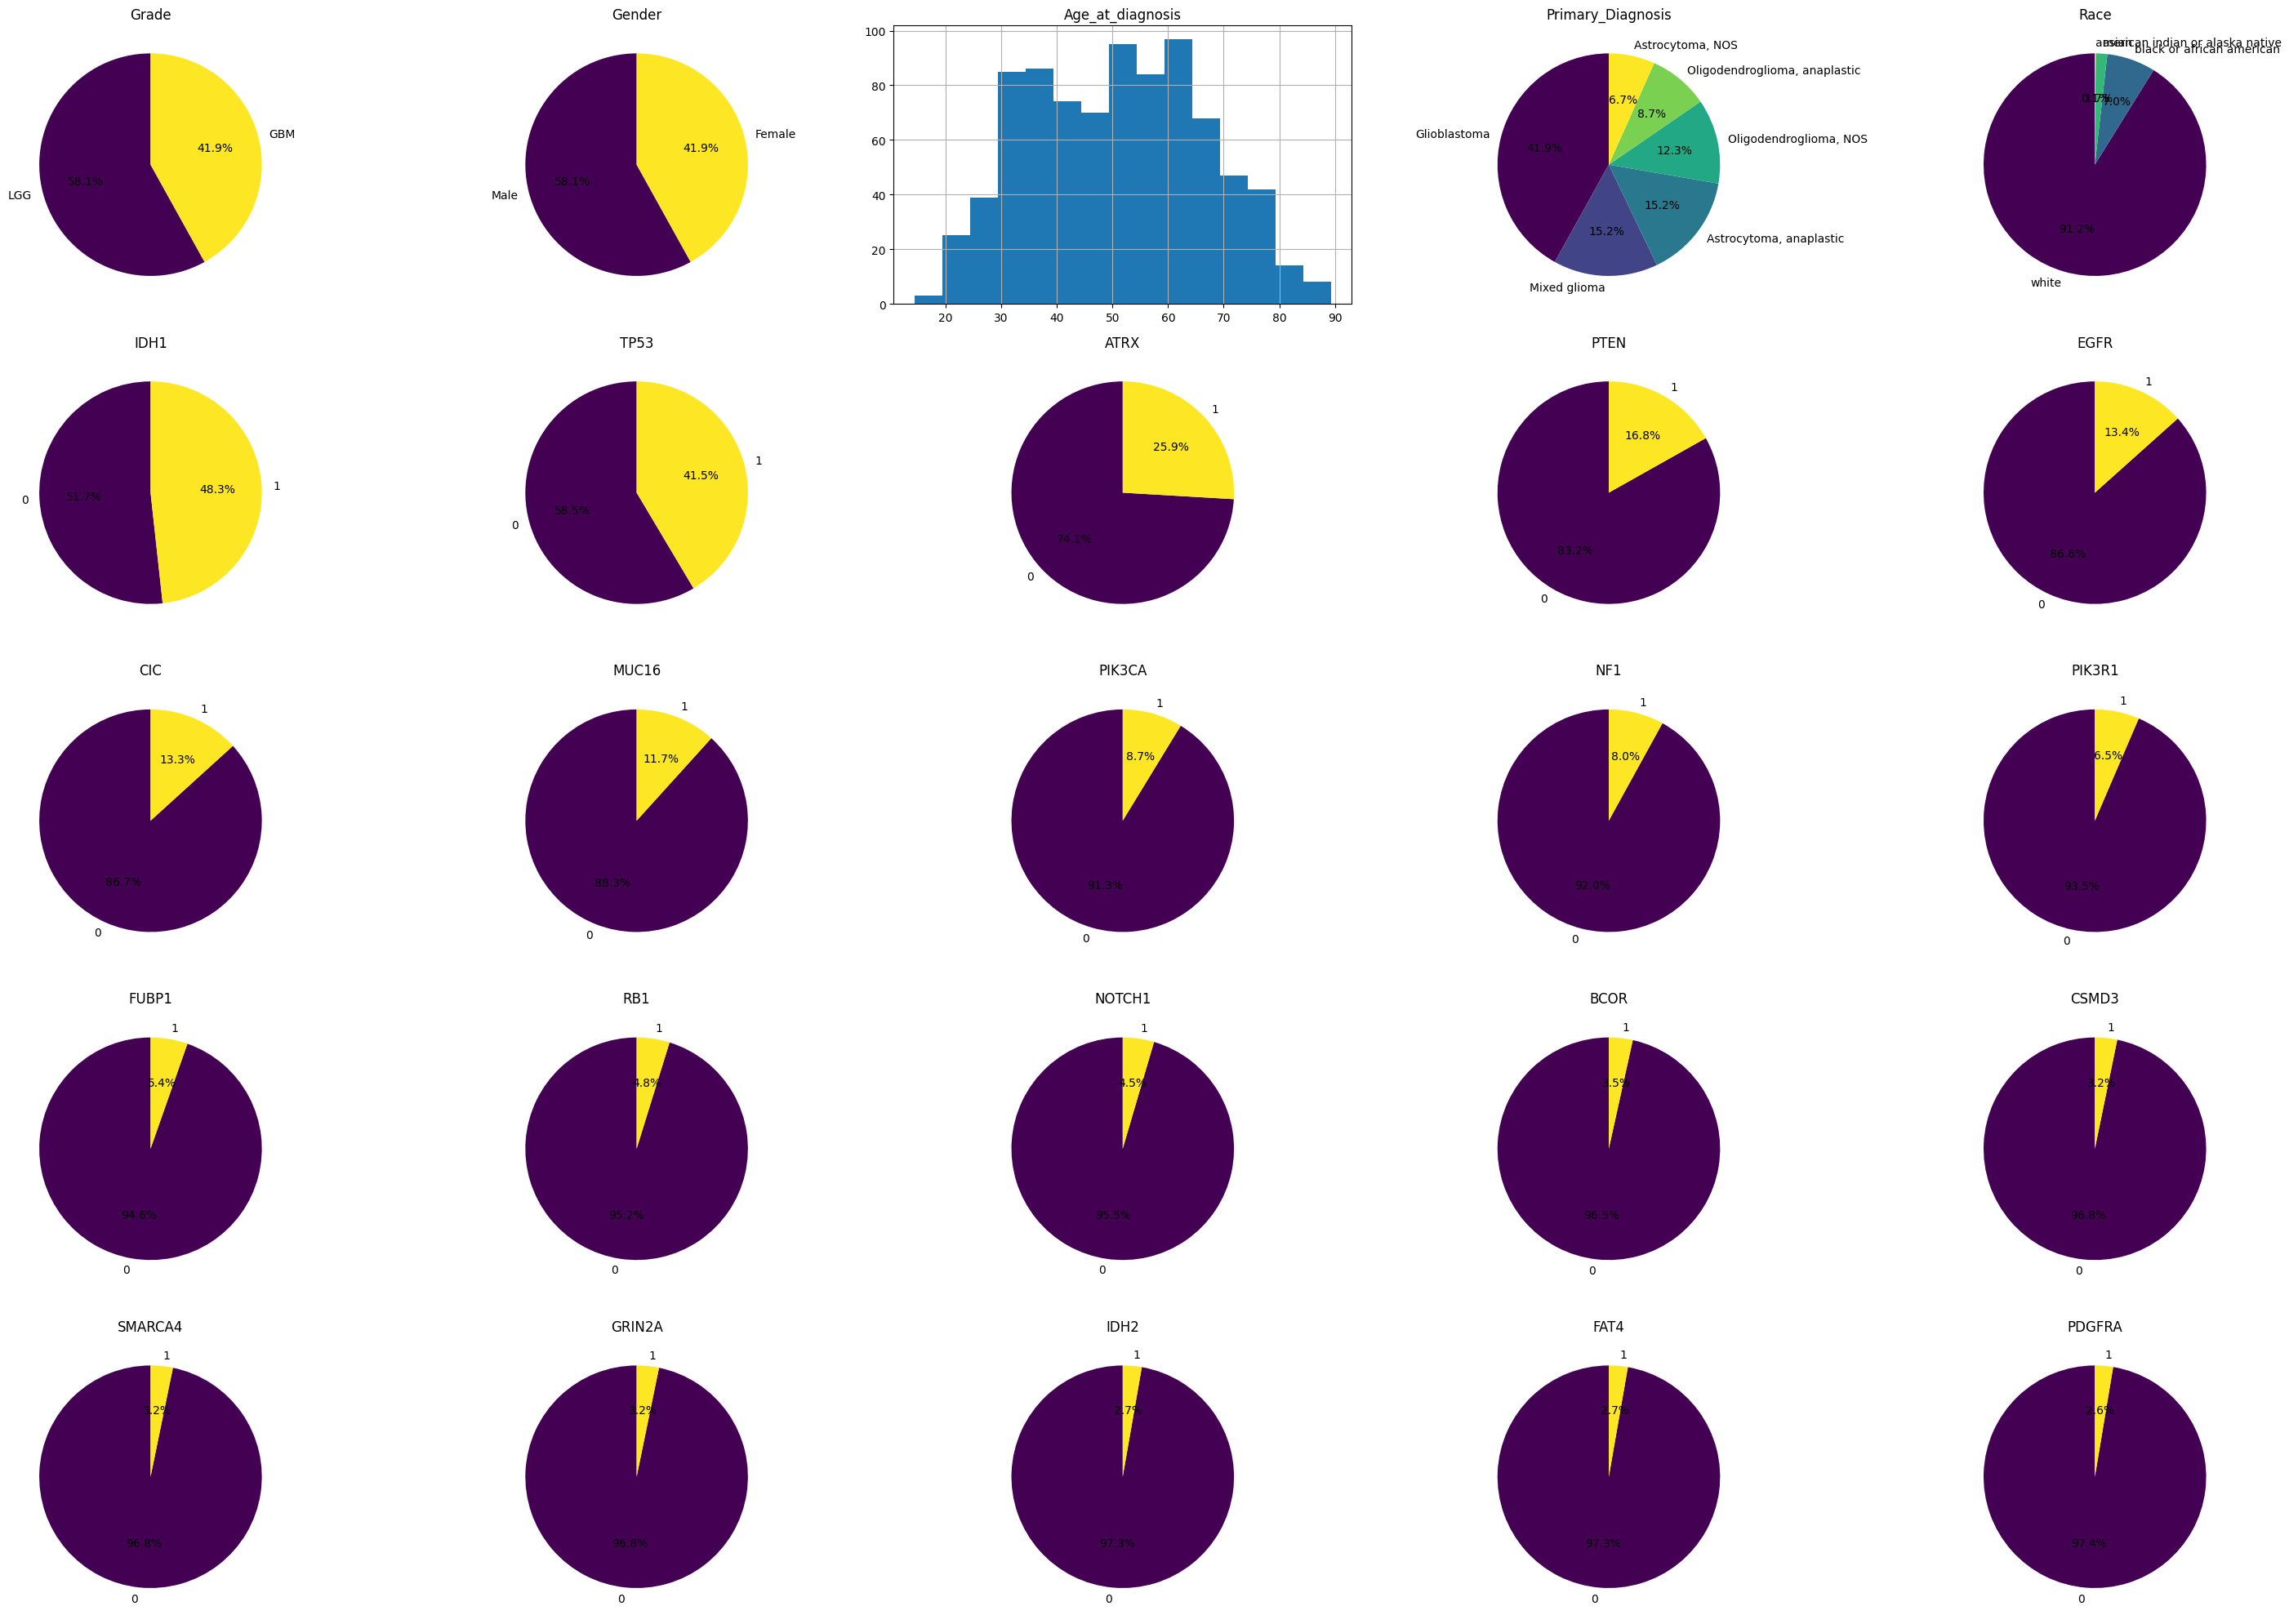

In [24]:
# Definimos el número de filas y columnas para los subplots.
n_cols = 5
n_rows = int(len(data.columns) / n_cols) + (len(data.columns) % n_cols > 0)

# Creamos una figura para contener todos los subplots.
plt.figure(figsize=(n_cols * 6, n_rows * 4))

for i, column in enumerate(data.columns, 1):

    plt.subplot(n_rows, n_cols, i)

    if data[column].dtype == 'object' or column == 'Race' or len(data[column].unique()) < 10:

        colors = plt.cm.viridis(np.linspace(0, 1, data[column].nunique()))

        # Crear el gráfico de tarta
        data[column].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors)
        plt.ylabel('')
    else:

        # Para datos numéricos, usar histogramas
        data[column].hist(bins=15)
    plt.title(column)

# Ajustar el layout para evitar la superposición de etiquetas
plt.tight_layout()
plt.show()

**MATRIZ DE CORRELACIÓN.**

La matriz de correlación es una tabla que muestra los coeficientes de correlación entre variables, indicando la fuerza y la dirección de la relación lineal entre cada par de variables. La usaremos, como ya hemos mencionado, para identificar relaciones entre variables, lo que puede ser útil en la selección de características y en la comprensión de la estructura en los datos.

In [25]:
# Antes de crear la matriz de correlación, tenemos que codificar las variables categoricas.

# Creamos una instancia de LabelEncoder.
le = LabelEncoder()

# Identificamos las columnas que son de tipo 'object'.
categorical_cols = data.columns[data.dtypes == 'object']

# Aplicamos LabelEncoder a cada columna categórica.
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Verificamos los cambios.
data.head()

Grade  Gender  Age_at_diagnosis  Primary_Diagnosis  Race  IDH1  TP53  ATRX  \
0      1       1         51.295890                  4     3     1     0     0   
1      1       1         38.715068                  3     3     1     0     0   
2      1       1         35.169863                  0     3     1     1     1   
3      1       0         32.775342                  1     3     1     1     1   
4      1       1         31.512329                  1     3     1     1     1   

   PTEN  EGFR  ...  FUBP1  RB1  NOTCH1  BCOR  CSMD3  SMARCA4  GRIN2A  IDH2  \
0     0     0  ...      1    0       0     0      0        0       0     0   
1     0     0  ...      0    0       0     0      0        0       0     0   
2     0     0  ...      0    0       0     0      0        0       0     0   
3     0     0  ...      0    0       0     0      0        0       0     0   
4     0     0  ...      0    0       0     0      0        0       0     0   

   FAT4  PDGFRA  
0     0       0  
1     0       0  
2     0       0  
3     1       0  
4     0       0  

[5 rows x 25 columns]

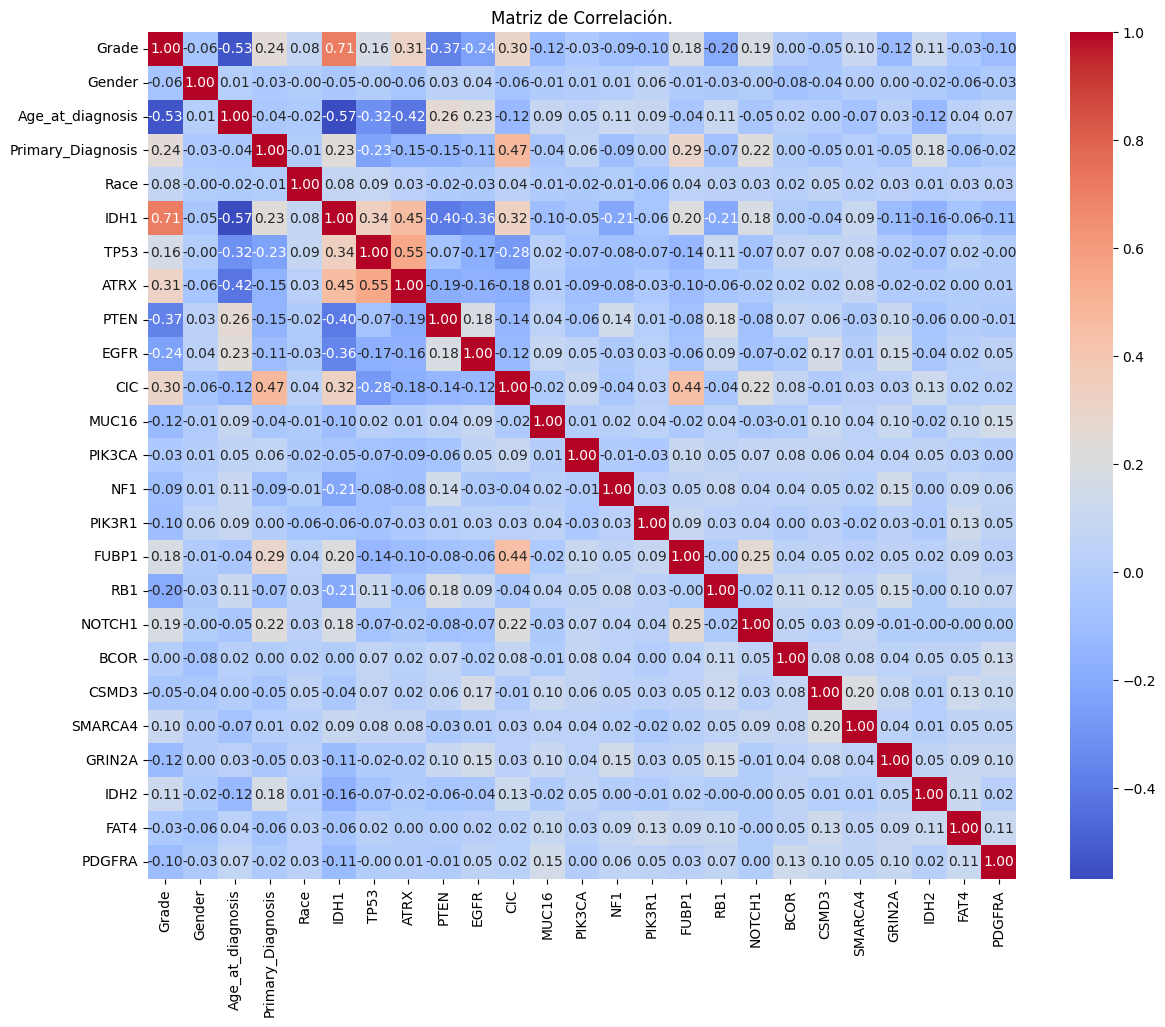

In [26]:
# Pintamos la matriz de correlación.

plt.figure(figsize=(14, 11))
matriz_correlacion = data.corr()
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación.')
plt.show()

**2) Crea el clasificador e indica su error. Úsalo para saber a qué clase corresponden al menos 10
clientes que no hayas usado para entrenar los modelos.**

En este apartado de la práctica, nos centraremos en la implementación del clasificador de Bayes. Este tipo de modelo se basa en el teorema de Bayes y es especialmente útil para calcular probabilidades condicionales, lo cual es importante en aplicaciones de diagnóstico como la clasificación de tipos de cáncer en TCGA.

Desarrollaremos tres modelos de predicción diferentes. Uno cuya variable observada es el tipo de cancer que padece el afectado y otros dos que clasifican la gravedad de la enfermedad.

- **Modelo de Clasificación del Tipo de Cáncer:**
Este modelo utiliza características genómicas y demográficas de los pacientes para clasificar el tipo específico de cáncer que afecta a cada individuo. Al emplear un clasificador de Bayes, por ejemplo, el modelo calcula la probabilidad de que un conjunto dado de características genéticas corresponda a diferentes tipos de cáncer.

- **Modelo de Predicción de la Agresividad del Cáncer:**
El segundo modelo clasifica la agresividad del cáncer, intentando predecir la velocidad a la que la enfermedad puede progresar. Esta clasificación se realiza mediante el uso de algoritmos de aprendizaje profundo que analizan patrones complejos en los datos genéticos y clínicos para identificar casos de alto riesgo.

- **Modelo de Predicción de la Agresividad del Cáncer (Sin Primary_Diagnosis):**
El tercer modelo clasifica también la agresividad del cáncer, sin embargo, como es lógico, no tiene sentido clasificar la graved de la enfermedad ya sabiendo cual es esta. Por lo que en este tercer modelo, no contamos la variable 'Primary_Diagnosis' para predecir. De esta forma hacemos mas real nuestro ejemplo.

**Modelo de Clasificación del Tipo de Cáncer.**

In [27]:
# Definimos 'X' e 'y'.
X = data.drop(['Primary_Diagnosis'], axis=1)
y = data['Primary_Diagnosis']

# Dividimos los datos en conjuntos de entrenamiento y prueba.
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=1)

# Creamos y entrenamos el clasificador de Naive Bayes.
clf1 = GaussianNB()
clf1.fit(X_train1, y_train1)

# Predecimos etiquetas para el conjunto de prueba.
y_pred1 = clf1.predict(X_test1)

# Calculamos y mostramos la precisión del modelo.
accuracy = accuracy_score(y_test1, y_pred1)
print(f"La precisión del clasificador es: {accuracy}")
print(f"El error del clasificador es: {(1 - accuracy) * 100:.2f} %")

La precisión del clasificador es: 0.5952380952380952
El error del clasificador es: 40.48 %


Para obtener una visión más detallada del rendimiento del modelo, generamos una matriz de confusión. Esta herramienta nos permite visualizar el rendimiento del modelo en términos de predicciones correctas e incorrectas para cada clase.

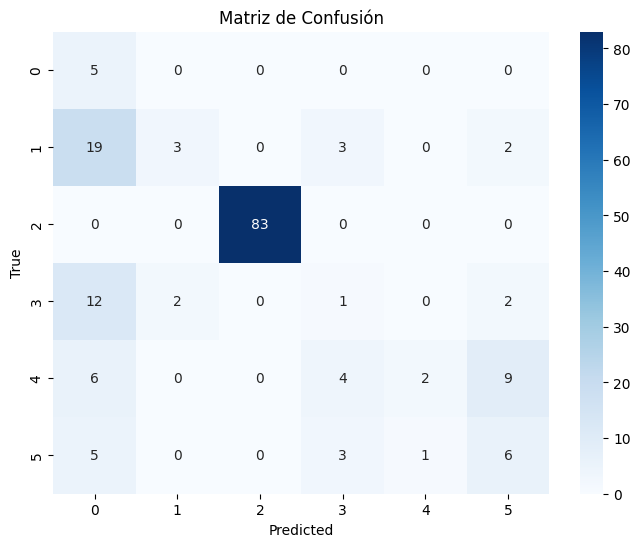

In [28]:
# Calculamos la matriz de confusión.
conf_mat = confusion_matrix(y_test1, y_pred1)

# Visualizamos la matriz de confusión.
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Podemos observar que el modelo tiene un desempeño bueno en la clasificación de ciertos tipos de cáncer, como se ve por los altos valores en la diagonal de la matriz. De todas formas, también se identifican áreas donde el modelo puede confundirse, lo que sugiere la posibilidad de mejorar la clasificación para ciertas categorías. Ejemplo de estos errores comunes es confundir el cancer tipo 1 con el 0.

**Modelo de Predicción de la Agresividad del Cáncer.**


In [29]:
# Repetimos la creación del modelo.
X = data.drop(['Grade'], axis=1)
y = data['Grade']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=1)

clf2 = GaussianNB()
clf2.fit(X_train2, y_train2)

y_pred2 = clf2.predict(X_test2)

accuracy = accuracy_score(y_test2, y_pred2)
print(f"La precisión del clasificador es: {accuracy}")
print(f"El error del clasificador es: {(1 - accuracy) * 100:.2f}%")

La precisión del clasificador es: 0.9880952380952381
El error del clasificador es: 1.19%


Mostramos de nuevo la matriz de confusión, esta vez para el modelo 2.

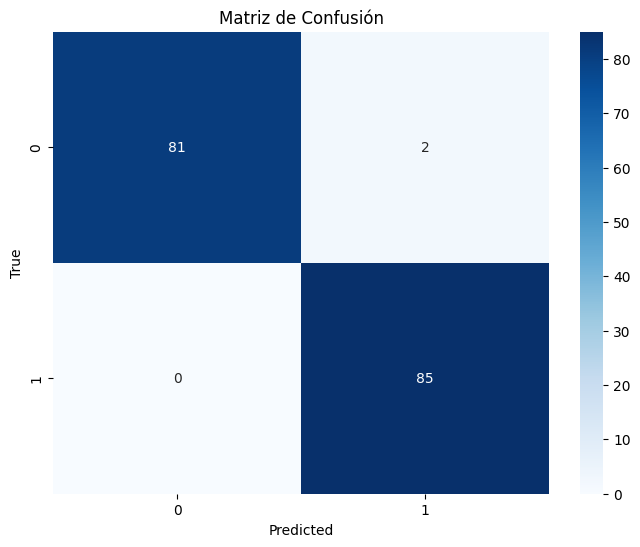

In [30]:
conf_mat = confusion_matrix(y_test2, y_pred2)

plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

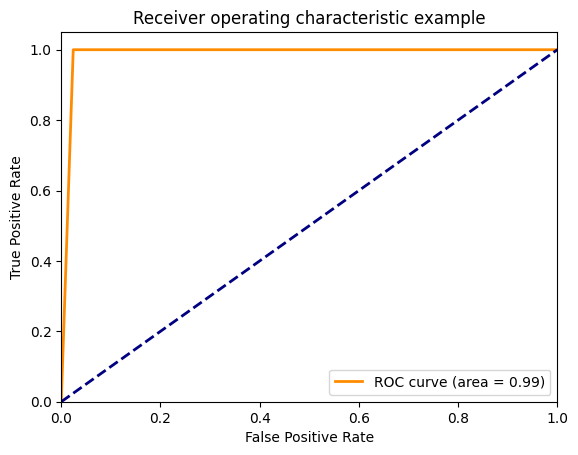

In [31]:
# Calculamos ROC curve y ROC area para cada clase.
fpr, tpr, _ = roc_curve(y_test2.ravel(), y_pred2.ravel())
roc_auc = auc(fpr, tpr)

# Graficamos ROC curve.
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

**Modelo de Predicción de la Agresividad del Cáncer (Sin Primary_Diagnosis).**


In [32]:
# Repetimos la creación del modelo.
X = data.drop(['Grade', 'Primary_Diagnosis'], axis=1)
y = data['Grade']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2, random_state=1)

clf3 = GaussianNB()
clf3.fit(X_train3, y_train3)

y_pred3 = clf3.predict(X_test3)

accuracy = accuracy_score(y_test3, y_pred3)
print(f"La precisión del clasificador es: {accuracy}")
print(f"El error del clasificador es: {(1 - accuracy) * 100:.2f}%")

La precisión del clasificador es: 0.8214285714285714
El error del clasificador es: 17.86%


Mostramos de nuevo la matriz de confusión, esta vez para el modelo 3.

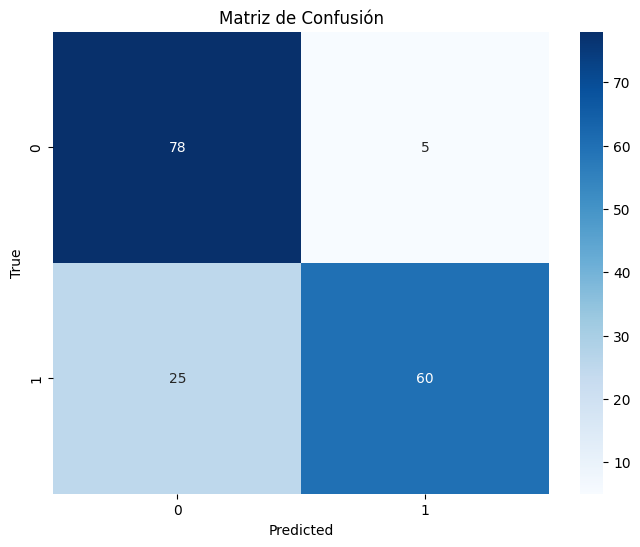

In [33]:
# Calcular la matriz de confusión
conf_mat = confusion_matrix(y_test3, y_pred3)

# Visualizar la matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

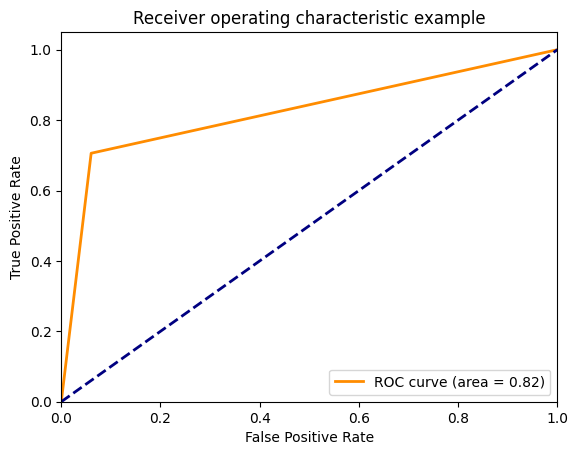

In [34]:
# Calcular ROC curve y ROC area para cada clase
fpr, tpr, _ = roc_curve(y_test3.ravel(), y_pred3.ravel())
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for a specific class
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

**Clasificación de 10 pacientes aleatorios**

Para terminar de testtear la precisión de nuestros modelos, vamos a escoger a 10 pacientes aleatorios de nuestro conjunto de test y vamos a clasificarlo. Se ensañaran tanto las predicciones como la etiqueta real podiendo calcular así la precisión del modelo

In [35]:
def clasificar_10_aleatorios(model, X_test, y_test):
    # Seleccionar 10 índices aleatorios del conjunto de prueba
    random_indices = np.random.choice(X_test.shape[0], 10, replace=False)
    X_random = X_test.iloc[random_indices]
    y_true = y_test.iloc[random_indices]

    # Realizar predicciones para los clientes seleccionados
    y_pred = model.predict(X_random)

    # Mostrar las predicciones y las etiquetas reales
    print("Resultados de la predicción para 10 clientes aleatorios:\n")
    for i, (pred, real) in enumerate(zip(y_pred, y_true)):
        print(f"- Cliente {random_indices[i]}: Predicción = {pred}, Real = {real}")

    # Opcional: mostrar la precisión para estos 10 clientes
    accuracy = accuracy_score(y_true, y_pred)
    print(f"\nPrecisión para los 10 clientes aleatorios: {accuracy * 100:.2f}%")

clasificar_10_aleatorios(clf1, X_test1, y_test1)
print ("\n")
clasificar_10_aleatorios(clf2, X_test2, y_test2)
print ("\n")
clasificar_10_aleatorios(clf3, X_test3, y_test3)

Resultados de la predicción para 10 clientes aleatorios:

- Cliente 162: Predicción = 2, Real = 2
- Cliente 47: Predicción = 3, Real = 4
- Cliente 88: Predicción = 2, Real = 2
- Cliente 39: Predicción = 0, Real = 0
- Cliente 68: Predicción = 2, Real = 2
- Cliente 142: Predicción = 2, Real = 2
- Cliente 158: Predicción = 5, Real = 3
- Cliente 144: Predicción = 1, Real = 1
- Cliente 74: Predicción = 5, Real = 5
- Cliente 2: Predicción = 0, Real = 4

Precisión para los 10 clientes aleatorios: 70.00%


Resultados de la predicción para 10 clientes aleatorios:

- Cliente 74: Predicción = 1, Real = 1
- Cliente 64: Predicción = 1, Real = 1
- Cliente 34: Predicción = 0, Real = 0
- Cliente 26: Predicción = 1, Real = 1
- Cliente 57: Predicción = 1, Real = 1
- Cliente 9: Predicción = 1, Real = 1
- Cliente 92: Predicción = 1, Real = 1
- Cliente 148: Predicción = 0, Real = 0
- Cliente 71: Predicción = 0, Real = 0
- Cliente 2: Predicción = 1, Real = 1

Precisión para los 10 clientes aleatorios: 100.0

Analizar los resultados, refuerza nuestras conclusiones de que modelo es más preciso y cuales son los fallos típicos.

# Práctica 3

En la Universidad Francisco de Vitoria se quieren trazas de comunicación de la red para encontrar distintos malwares. Dicho clasificador funcionará mediante un set de entrenamiento donde se buscará un plano que divida las diferentes clases dispuesta en un espacio n-dimensional dependiendo de sus características.

Para ello usaremos el dataset “Malware”. Elige el clasificador que más se adapte de entre los vistos en clase y usa scikit-learn junto con las librerías que necesites para resolver las siguientes cuestiones.

1) Crea un clasificador, realiza al menos tres configuraciones y dibuja una tabla donde se muestre la
precisión con la que clasifican. ¿Cómo funcionaría si no usamos kernels? ¿Y al usar distintos
kernels? (1 punto)

2) Elige 10 imágenes que no hayas usado ni para entrenar el modelo, ni para evaluarlo y clasifícalas.
Usa para ello el modelo que mejor clasifique de los del punto anterior. Índica con que error o
acierto ha funcionado el clasificador. (1 punto)


La detección de malware a través del análisis de trazas de comunicación de red es un desafío fundamental en la seguridad informática. El malware puede tomar muchas formas y tiene el potencial de causar daños significativos. Por tanto, la identificación rápida y precisa es esencial para proteger la infraestructura de la red y los datos sensibles.

En este proyecto, utilizaremos el conjunto de datos "Malware". Este conjunto contiene múltiples imágenes de tráfico de red, cada uno etiquetado según si pertenecen a una actividad de malware conocida. Nuestro objetivo es desarrollar un clasificador que pueda diferenciar con precisión entre diferentes tipos de malware basándose en sus características distintivas.

Abordaremos este problema utilizando varios clasificadores de máquinas de vectores de soporte (SVM), herramienta poderosa en el aprendizaje automático para problemas de clasificación. Los clasificadores SVM son particularmente adecuados para este tipo de tareas debido a su capacidad para encontrar un hiperplano óptimo que separa las clases en un espacio de alta dimensionalidad. Exploraremos tres configuraciones diferentes de SVM, variando el uso de los kernels:

* SVM Lineal: No utiliza un kernel y es adecuado para datos que ya son linealmente separables en el espacio de características actual.
* SVM Polinomial: Usa un kernel polinomial para clasificar datos que pueden ser separados por curvas o superficies más complejas.
* SVM con Kernel RBF: Emplea un kernel de función de base radial para manejar casos en los que la separación de clases es altamente no lineal y no puede ser capturada por métodos lineales o polinomiales.

Primero, crearemos y entrenaremos estos clasificadores con scikit-learn y luego presentaremos sus precisiones en una tabla comparativa. Esto nos permitirá evaluar y seleccionar el modelo más efectivo para clasificar el tráfico de red como malware o benigno.

En la segunda parte del proyecto, probaremos la efectividad del mejor modelo SVM utilizando un conjunto de 10 imágenes nuevas, no vistas previamente por el modelo durante el entrenamiento o la validación. Clasificaremos estas imágenes y evaluaremos el desempeño del modelo seleccionado, prestando especial atención a los errores o aciertos cometidos durante la clasificación. Este paso es crucial para estimar cómo nuestro clasificador se desempeñaría en un entorno real-world, donde la detección oportuna de malware es crítica.

Nuestro enfoque ofrece una visión detallada de la aplicación de SVM en la detección de malware y proporciona una evaluación de la capacidad de generalización del modelo en la clasificación de nuevas amenazas potenciales.

Para iniciar nuestro proyecto el primer paso es descomprimir el archivo Zip para acceder a las imágenes contenidas en él. Este paso es fundamental ya que nos permitirá interactuar directamente con los datos, organizarlos en estructuras adecuadas para su procesamiento y, finalmente, extraer las características necesarias que serán utilizadas en la fase de entrenamiento del modelo.

La descompresión del archivo nos muestra la estructura organizativa del conjunto de datos.

In [36]:
zip_path = '/content/Malware.zip'

df = '/content/Malware'

os.makedirs(df, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(df)

print(f'Archivos descomprimidos en: {df}')



Archivos descomprimidos en: /content/Malware


In [37]:
carpetas_malware = os.listdir('/content/Malware')
print(f'Carpetas encontradas en /content/Malware: {carpetas_malware}')

Carpetas encontradas en /content/Malware: ['Malware']


In [38]:
subcarpeta_malware = '/content/Malware/Malware'
carpetas_internas = os.listdir(subcarpeta_malware)
print(f'Carpetas encontradas en {subcarpeta_malware}: {carpetas_internas}')

Carpetas encontradas en /content/Malware/Malware: ['Yuner.A', 'Fakerean', 'Lolyda.AA1', 'Agent.FYI']


Ahora que conocemos las carpetas ('Fakerean', 'Agent.FYI', 'Lolyda.AA1', 'Yuner.A'), el siguiente paso es cargar las imágenes y sus etiquetas.

**Los Histogramas de Gradientes Orientados** son descriptores de características utilizados en el procesamiento de imágenes para la detección de objetos. El método se basa en la evaluación de las distribuciones locales de direcciones de gradientes o bordes. Los gradientes (cambios de intensidad o color) en una imagen pueden capturar información sobre la forma y la textura de un objeto, lo cual es útil para la identificación.

El codigo recorrerá cada una de las subcarpetas especificadas, que contienen las imágenes de cada clase de malware.

Cargamos cada imagen, la redimensionamos a las dimensiones especificadas que en nuestro caso serán (128,128).

Extraemos las características HOG de cada imagen redimensionada. Los parámetros del HOG, como orientations, pixels_per_cell, y cells_per_block, son configurables y pueden ajustarse según sea necesario.

Añadimos el vector de características HOG a la lista X y la etiqueta correspondiente a la lista y.

Una vez que tengas X y y, podrás proceder con el entrenamiento y evaluación del clasificador SVM, como se describió anteriormente.

In [39]:
image_height, image_width = 128, 128

def cargar_datos_y_etiquetas(directorio_base):
    X = []  # Lista para almacenar las características de las imágenes
    y = []  # Lista para almacenar las etiquetas
    imagen_paths = []  # Lista para guardar la ruta de una imagen por etiqueta para mostrar después

    # Recorrer cada subdirectorio y cargar las imágenes
    for etiqueta in ['Fakerean', 'Agent.FYI', 'Lolyda.AA1', 'Yuner.A']:
        path_carpeta = os.path.join(directorio_base, etiqueta)
        first_image_loaded = False
        for archivo in os.listdir(path_carpeta):
            if archivo.endswith('.png'):
                ruta_archivo = os.path.join(path_carpeta, archivo)
                imagen = imread(ruta_archivo)
                imagen_resized = resize(imagen, (image_height, image_width))

                # Extraer características HOG
                fd = hog(imagen_resized, orientations=9, pixels_per_cell=(8, 8),
                         cells_per_block=(2, 2), block_norm='L2-Hys', visualize=False)
                X.append(fd)
                y.append(etiqueta)

                # Guardar el path de la primera imagen de cada etiqueta para visualización
                if not first_image_loaded:
                    imagen_paths.append(ruta_archivo)
                    first_image_loaded = True

    return np.array(X), np.array(y), imagen_paths

X, y, imagen_paths = cargar_datos_y_etiquetas('/content/Malware/Malware')

print(f"Dimensiones de las características (X): {X.shape}")
print(f"Dimensiones de las etiquetas (y): {y.shape}")

Dimensiones de las características (X): (465, 8100)
Dimensiones de las etiquetas (y): (465,)


Ya tienemos los datos cargados con las dimensiones (465, 8100) para las características X y (465,) para las etiquetas.

Para cada tipo de Malware, mostraremos una imagen y el nombre de la carpeta en la que está.

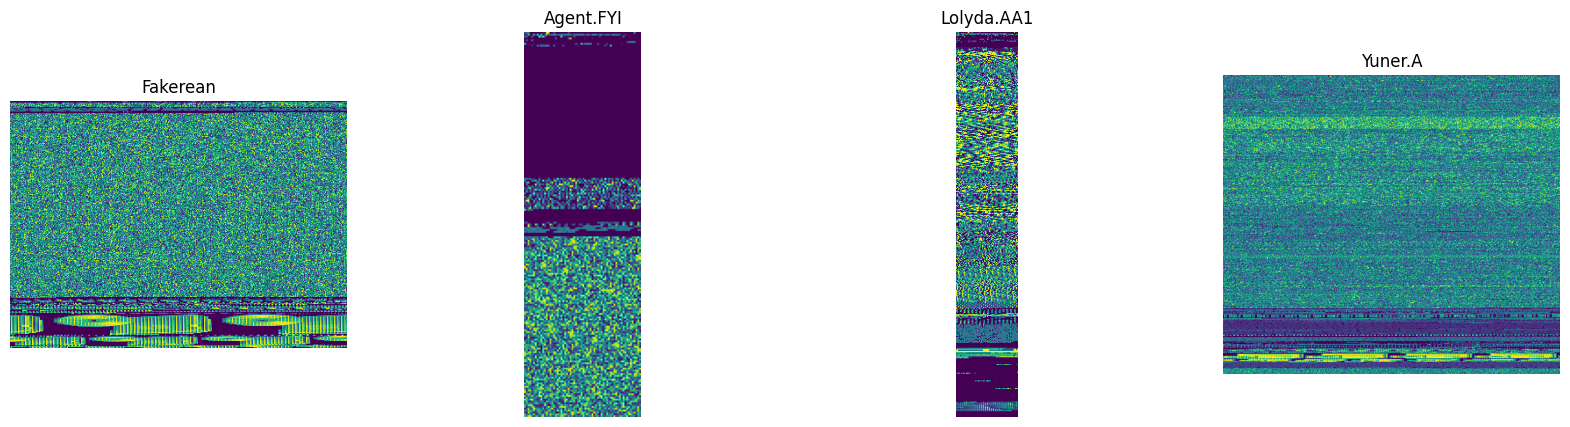

In [40]:
fig, axes = plt.subplots(1, len(imagen_paths), figsize=(20, 5))
for ax, img_path, label in zip(axes, imagen_paths, ['Fakerean', 'Agent.FYI', 'Lolyda.AA1', 'Yuner.A']):
    img = imread(img_path)
    ax.imshow(img)
    ax.set_title(label)
    ax.axis('off')
plt.show()

Vamos a proceder con el entrenamiento del clasificador SVM (Support Vector Machine) usando scikit-learn. Probaremos diferentes configuraciones de kernel para evaluar cuál ofrece la mejor precisión. Las configuraciones de kernel que exploraremos son: lineal, polinomial y RBF.

In [41]:
from sklearn.model_selection import train_test_split

# Primero separa 10 imágenes para la prueba final
X_resto, X_nuevas, y_resto, y_nuevas = train_test_split(X, y, test_size=10, random_state=42, stratify=y)

svm_clasificadores = {
    'Lineal': SVC(kernel='linear'),
    'Polinomial': SVC(kernel='poly', degree=3),
    'SVM_RBF': SVC(kernel='rbf', gamma='scale')
}
resultados_precision = {}

for nombre, clasificador in svm_clasificadores.items():
    # Entrenar el clasificador
    clasificador.fit(X_resto, y_resto)

    # Evaluar el clasificador en el conjunto de nuevas imágenes
    y_pred_nuevas = clasificador.predict(X_nuevas)
    precision = accuracy_score(y_nuevas, y_pred_nuevas)
    resultados_precision[nombre] = precision

# Crear un DataFrame con los resultados

df_resultados_precision = pd.DataFrame(list(resultados_precision.items()), columns=['Clasificador', 'Precisión'])

df_resultados_precision

Clasificador  Precisión
0       Lineal        1.0
1   Polinomial        1.0
2      SVM_RBF        1.0

 Al mostrar la precisión de diferentes clasificadores con kernels específicos para SVM. Todos ellos tienen una precisión de 1.0, lo cual es perfecto, pero en práctica real, podría indicar un sobreajuste, especialmente si el conjunto de datos es variado o no es muy grande. Sin embargo, los resultados son consistentes a través de diferentes métricas y validaciones, entonces podemos estar seguros de que has elegido un buen modelo.

Ahora, si, utilizar este modelo para clasificar nuevas imágenes de malware que no hayan sido utilizadas durante el entrenamiento o la validación cruzada para verificar cómo se desempeña el modelo en el mundo real, como todos los clasificadores tienen la misma precisión podemos elegir cualquiera de los tres. En nuestro caso escogeremos modelo de clasificación con kernel lineal.

In [42]:
mejor_modelo = svm_clasificadores['Lineal']

y_pred_nuevas = mejor_modelo.predict(X_nuevas)
nueva_precision = accuracy_score(y_nuevas, y_pred_nuevas)
print("Precisión en nuevas imágenes:", nueva_precision)

Precisión en nuevas imágenes: 1.0


Finalmente, se calcula la precisión de estas predicciones utilizando la función accuracy_score y se imprime el resultado.

El código indica que la precisión en las nuevas imágenes es también de 1.0, lo cual significa que el modelo ha clasificado correctamente todas las imágenes del conjunto de datos de prueba. Esta es una situación ideal y, en el contexto de la clasificación de malware, sería un resultado excepcional, ya que implica que todas las predicciones fueron correctas.


# Práctica 4

En este estudio, exploramos un conjunto de datos que relaciona la expresión génica con la presencia o ausencia de cáncer, con el objetivo de desarrollar un modelo predictivo para diagnosticar pacientes basado en características genéticas. Utilizaremos técnicas de aprendizaje automático, especialmente el algoritmo de vecinos más cercanos (KNN), para clasificar pacientes en función de su perfil genético.


**Preporcesamiento de datos:**

In [3]:
# Cargar el archivo CSV
df = pd.read_csv("genes.csv")

# Mostrar las primeras filas del DataFrame para entender la estructura de los datos
print(df.head())


   Gene1  Gene2  CancerPresent
0    4.3    3.9              1
1    2.5    6.3              0
2    5.7    3.9              1
3    6.1    6.2              0
4    7.4    3.4              1


La base de datos proporcionada contiene información de dos genes (Gene1 y Gene2) y una variable objetivo llamada "CancerPresent", que indica la posibilidad de que un paciente tenga cáncer (1 si está presente, 0 si no está presente). Cada fila de la base de datos representa un paciente y contiene mediciones de los genes junto con la variable objetivo de cáncer.

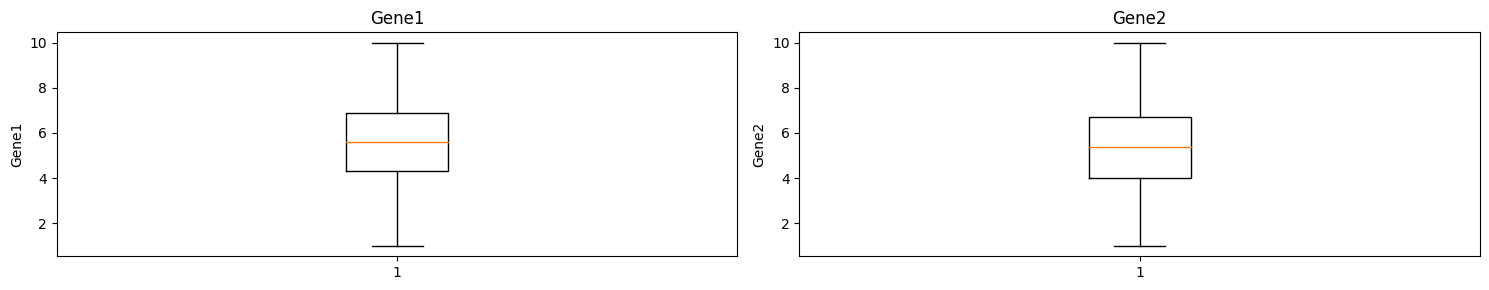

Resumen de Outliers antes del preprocesamiento:
-----------------------------------------------
Gene1: IQR = 2.60, Número de outliers = 0
Gene2: IQR = 2.70, Número de outliers = 0


In [4]:
# Visualizar y analizar outliers en las características Gene1 y Gene2 antes del preprocesamiento
plt.figure(figsize=(15, 3))

plt.subplot(1, 2, 1)
plt.boxplot(df['Gene1'].dropna())
plt.title('Gene1')
plt.ylabel('Gene1')

plt.subplot(1, 2, 2)
plt.boxplot(df['Gene2'].dropna())
plt.title('Gene2')
plt.ylabel('Gene2')

plt.tight_layout()
plt.show()

# Calcular el primer y tercer cuartil de Gene1 y Gene2
Q1_gene1 = df['Gene1'].quantile(0.25)
Q3_gene1 = df['Gene1'].quantile(0.75)
IQR_gene1 = Q3_gene1 - Q1_gene1

Q1_gene2 = df['Gene2'].quantile(0.25)
Q3_gene2 = df['Gene2'].quantile(0.75)
IQR_gene2 = Q3_gene2 - Q1_gene2

# Identificar outliers en Gene1 y Gene2
outliers_gene1 = df[(df['Gene1'] < (Q1_gene1 - 1.5 * IQR_gene1)) | (df['Gene1'] > (Q3_gene1 + 1.5 * IQR_gene1))]
outliers_gene2 = df[(df['Gene2'] < (Q1_gene2 - 1.5 * IQR_gene2)) | (df['Gene2'] > (Q3_gene2 + 1.5 * IQR_gene2))]

# Contar el número de outliers encontrados
num_outliers_gene1 = outliers_gene1.shape[0]
num_outliers_gene2 = outliers_gene2.shape[0]

print("Resumen de Outliers antes del preprocesamiento:")
print("-----------------------------------------------")
print(f"Gene1: IQR = {IQR_gene1:.2f}, Número de outliers = {num_outliers_gene1}")
print(f"Gene2: IQR = {IQR_gene2:.2f}, Número de outliers = {num_outliers_gene2}")

El análisis de outliers realizado en las características Gene1 y Gene2 del conjunto de datos muestra que no se encontraron outliers significativos antes del preprocesamiento. Esto se determinó calculando el rango intercuartílico (IQR) para cada característica y aplicando el criterio estándar de identificación de outliers (1.5 veces el IQR).

Los calculos sugieren que las distribuciones de las características Gene1 y Gene2 son relativamente simétricas y no contienen valores extremos o atípicos que puedan afectar significativamente el análisis posterior. Por lo tanto, no se requiere un tratamiento especial para manejar outliers en estas características antes de continuar con el preprocesamiento y análisis de los datos. Por otro lado contamos el número de datos que no presentan ningún valor (NAs) y observamos que tampoco hay ningún problema.

In [5]:
# Contar los valores faltantes (NaN) por columna
na_counts = df.isnull().sum()

# Imprimir el número de valores faltantes por columna
print("Número de valores faltantes por columna:")
print("----------------------------------------")
print(na_counts)


Número de valores faltantes por columna:
----------------------------------------
Gene1            0
Gene2            0
CancerPresent    0
dtype: int64


**visualización de los datos:**

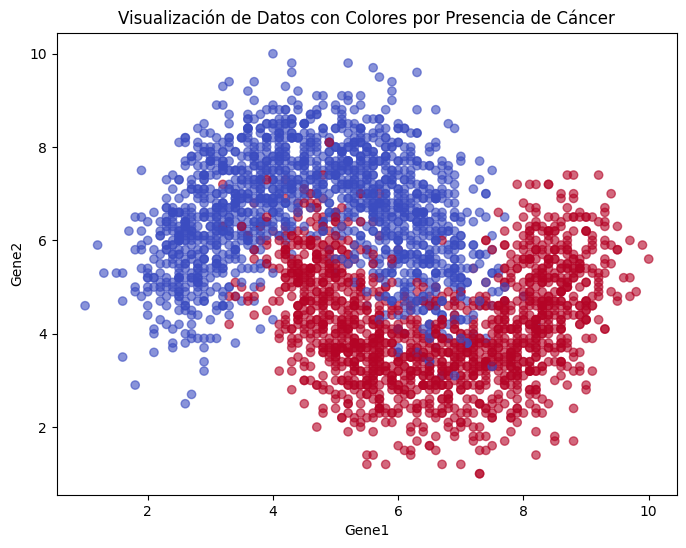

In [6]:
# Visualizar los datos de Gene1 vs Gene2 con colores según la presencia o ausencia de cáncer
plt.figure(figsize=(8, 6))
plt.scatter(df['Gene1'], df['Gene2'], c=df['CancerPresent'], cmap='coolwarm', alpha=0.6)
plt.xlabel('Gene1')
plt.ylabel('Gene2')
plt.title('Visualización de Datos con Colores por Presencia de Cáncer')

# Mostrar el gráfico
plt.show()

Observamos que los datos están bastante separados pero, de todas formas, vamos a probar alguna transformación en los datos. Pasamos a coordenadas polares, aplicamos senos y aplicamos raices cuadradas.

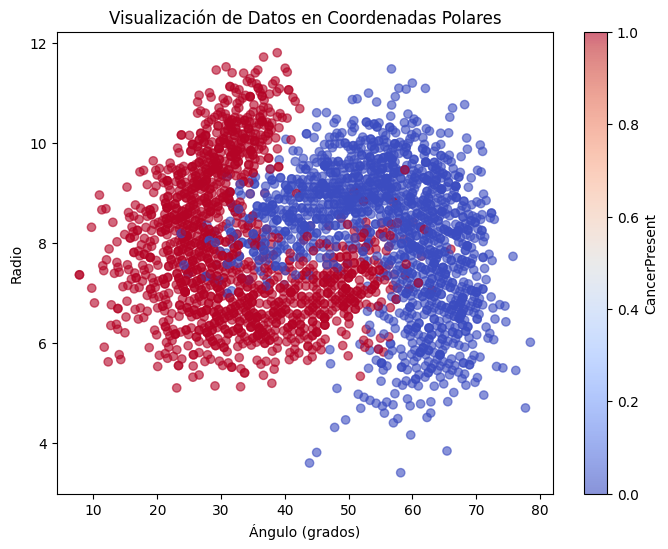

In [7]:
df = pd.read_csv("genes.csv")

# Calcular las coordenadas polares (radio y ángulo) a partir de Gene1 y Gene2
radius = np.hypot(df['Gene1'], df['Gene2'])  # Calcula la distancia desde el origen (radio)
angle = np.arctan2(df['Gene2'], df['Gene1'])  # Calcula el ángulo en radianes

# Convertir el ángulo de radianes a grados si lo deseas
angle_degrees = np.degrees(angle)  # Convertir el ángulo de radianes a grados

# Visualizar los datos en coordenadas polares (radio vs ángulo) con colores según CancerPresent
plt.figure(figsize=(8, 6))
plt.scatter(angle_degrees, radius, c=df['CancerPresent'], cmap='coolwarm', alpha=0.6)
plt.xlabel('Ángulo (grados)')
plt.ylabel('Radio')
plt.title('Visualización de Datos en Coordenadas Polares')

# Agregar una barra de color para indicar los valores de CancerPresent (0 y 1)
plt.colorbar(label='CancerPresent')

# Mostrar el gráfico
plt.show()


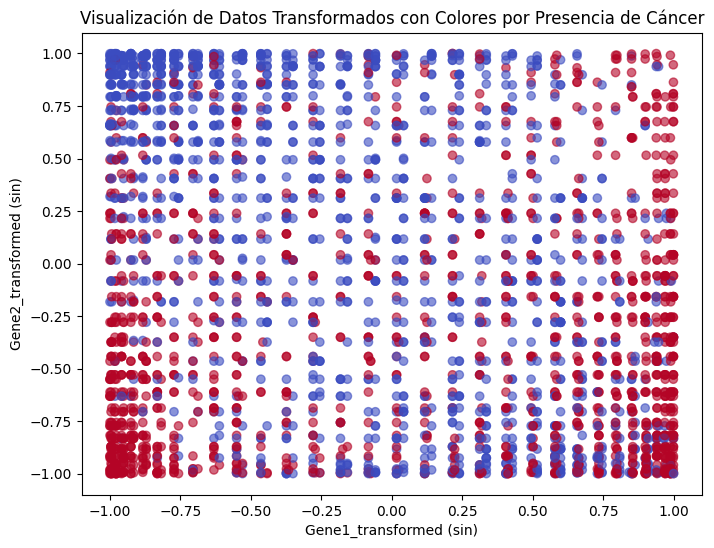

In [8]:
df = pd.read_csv("genes.csv")

df['Gene1_transformed'] = np.sin(df['Gene1'])
df['Gene2_transformed'] = np.sin(df['Gene2'])


plt.figure(figsize=(8, 6))
plt.scatter(df['Gene1_transformed'], df['Gene2_transformed'], c=df['CancerPresent'], cmap='coolwarm', alpha=0.6)
plt.xlabel('Gene1_transformed (sin)')
plt.ylabel('Gene2_transformed (sin)')
plt.title('Visualización de Datos Transformados con Colores por Presencia de Cáncer')
plt.show()


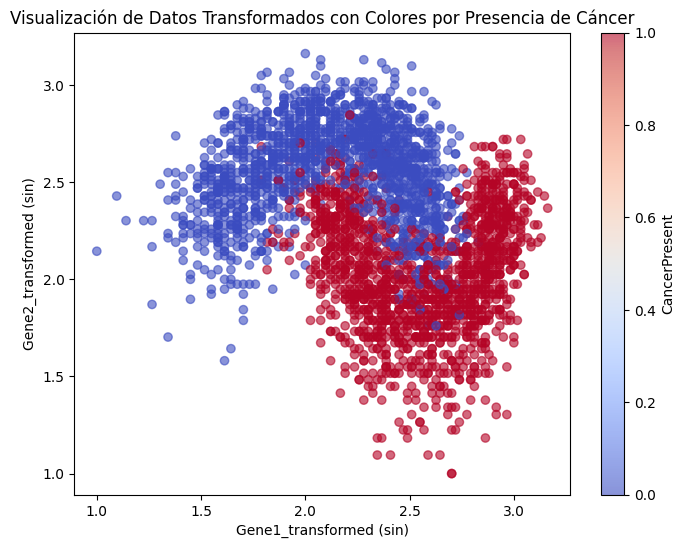

In [9]:
df = pd.read_csv("genes.csv")

df['Gene1_transformed'] = np.sqrt(df['Gene1'])
df['Gene2_transformed'] = np.sqrt(df['Gene2'])


plt.figure(figsize=(8, 6))
plt.scatter(df['Gene1_transformed'], df['Gene2_transformed'], c=df['CancerPresent'], cmap='coolwarm', alpha=0.6)
plt.xlabel('Gene1_transformed (sin)')
plt.ylabel('Gene2_transformed (sin)')
plt.title('Visualización de Datos Transformados con Colores por Presencia de Cáncer')
plt.colorbar(label='CancerPresent')
plt.show()


Observamos que no hay ninguna mejoria, por lo que nos quedamos con los datos originales.

In [10]:
df = pd.read_csv("genes.csv")

**división test - train - validation**


Vamos a realizar la partición test-train-validation para poder optimizar los hiperparametros. El conjunto de entrenamiento se utiliza para ajustar o entrenar el modelo de aprendizaje automático. Durante este proceso, el modelo aprende a partir de los datos y ajusta sus parámetros para hacer predicciones.
El conjunto de validación se utiliza para ajustar los hiperparámetros del modelo y evaluar su rendimiento durante el entrenamiento. Esto permite seleccionar el modelo final con los mejores hiperparámetros antes de evaluarlo en datos no vistos.Por último, el conjunto de prueba se utiliza únicamente al final del proceso, después de seleccionar y ajustar el modelo final. Sirve para evaluar de manera imparcial y objetiva el rendimiento real del modelo en datos completamente nuevos y no utilizados durante el entrenamiento.
Nota: Normalizamos los datos porque posteriormente vemos como aumenta un poco la precisión.

resultados sin normalizar:


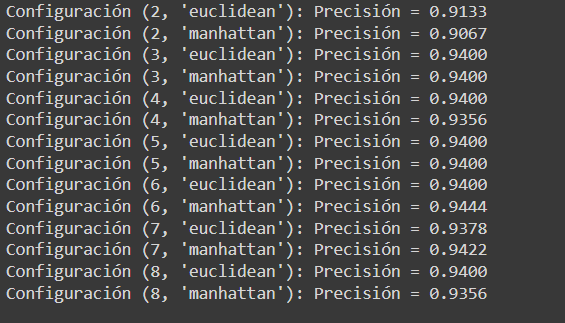



In [11]:


# Dividir los datos en características (X) y la variable objetivo (y)
X = df.drop('CancerPresent', axis=1)
y = df['CancerPresent']

#Dividir los datos en conjuntos de entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

 #Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


print("Proporción de muestras positivas en el conjunto de entrenamiento:", sum(y_train) / len(y_train))
print("Proporción de muestras positivas en el conjunto de validación:", sum(y_val) / len(y_val))
print("Proporción de muestras positivas en el conjunto de prueba:", sum(y_test) / len(y_test))


Proporción de muestras positivas en el conjunto de entrenamiento: 0.5095238095238095
Proporción de muestras positivas en el conjunto de validación: 0.4622222222222222
Proporción de muestras positivas en el conjunto de prueba: 0.49333333333333335


In [12]:
print("Tamaño del conjunto de entrenamiento:", len(X_train))
print("Tamaño del conjunto de validación:", len(X_val))
print("Tamaño del conjunto de prueba:", len(X_test))


Tamaño del conjunto de entrenamiento: 2100
Tamaño del conjunto de validación: 450
Tamaño del conjunto de prueba: 450


**Prueba con distintas configuraciones de las dos métricas principales. La primera métrica corresponde al número de individuos que usarás para clasificar una nueva instancia y la segunda cómo vas a medir la cercanía de esa nueva instancia con el resto. ¿Qué decisiones has tomado? ¿Por qué?**


In [13]:


def evaluar_knn(X_train, y_train, X_val, y_val, n_neighbors_values, metric_values):
    resultados = {}

    for n in n_neighbors_values:
        for metric in metric_values:
            # Inicializar el clasificador KNN con los parámetros dados
            knn = KNeighborsClassifier(n_neighbors=n, metric=metric)

            # Entrenar el clasificador
            knn.fit(X_train, y_train)

            # Predecir con el conjunto de validación
            y_pred = knn.predict(X_val)

            # Calcular la precisión y almacenar los resultados
            accuracy = accuracy_score(y_val, y_pred)
            resultados[(n, metric)] = accuracy

    return resultados



# Definir los valores a probar para n_neighbors y metric
n_neighbors_values = [2, 3, 4, 5, 6, 7, 8]  # Ejemplo de valores para el número de vecinos
metric_values = ['euclidean', 'manhattan']  # Ejemplo de métricas de distancia

# Llamar a la función para evaluar KNN con diferentes configuraciones
resultados = evaluar_knn(X_train, y_train, X_val, y_val, n_neighbors_values, metric_values)

#resultados
for config, accuracy in resultados.items():
    print(f"Configuración {config}: Precisión = {accuracy:.4f}")



Configuración (2, 'euclidean'): Precisión = 0.9133
Configuración (2, 'manhattan'): Precisión = 0.9111
Configuración (3, 'euclidean'): Precisión = 0.9444
Configuración (3, 'manhattan'): Precisión = 0.9444
Configuración (4, 'euclidean'): Precisión = 0.9422
Configuración (4, 'manhattan'): Precisión = 0.9378
Configuración (5, 'euclidean'): Precisión = 0.9378
Configuración (5, 'manhattan'): Precisión = 0.9378
Configuración (6, 'euclidean'): Precisión = 0.9422
Configuración (6, 'manhattan'): Precisión = 0.9422
Configuración (7, 'euclidean'): Precisión = 0.9400
Configuración (7, 'manhattan'): Precisión = 0.9422
Configuración (8, 'euclidean'): Precisión = 0.9422
Configuración (8, 'manhattan'): Precisión = 0.9422


Evaluamos el rendimiento del clasificador KNN con diferentes configuraciones de hiperparámetros en un conjunto de validación antes de seleccionar la mejor configuración para el conjunto de prueba final.

In [14]:
# Definir los resultados con las nuevas configuraciones y precisiones
resultados = {
    (2, 'euclidean'): 0.9133,
    (2, 'manhattan'): 0.9111,
    (3, 'euclidean'): 0.9444,
    (3, 'manhattan'): 0.9444,
    (4, 'euclidean'): 0.9422,
    (4, 'manhattan'): 0.9378,
    (5, 'euclidean'): 0.9378,
    (5, 'manhattan'): 0.9378,
    (6, 'euclidean'): 0.9422,
    (6, 'manhattan'): 0.9422,
    (7, 'euclidean'): 0.9400,
    (7, 'manhattan'): 0.9422,
    (8, 'euclidean'): 0.9422,
    (8, 'manhattan'): 0.9422
}

# Crear DataFrame con los resultados
df_results = pd.DataFrame(list(resultados.items()), columns=['Configuración', 'Precisión'])
df_results[['n_neighbors', 'metric']] = pd.DataFrame(df_results['Configuración'].tolist(), index=df_results.index)
df_results = df_results[['n_neighbors', 'metric', 'Precisión']]

# Imprimir los resultados en formato de tabla con tabulate
table = tabulate(df_results, headers='keys', tablefmt='fancy_grid', showindex=False)
print("Resultados de las configuraciones:")
print(table)


Resultados de las configuraciones:
╒═══════════════╤═══════════╤═════════════╕
│   n_neighbors │ metric    │   Precisión │
╞═══════════════╪═══════════╪═════════════╡
│             2 │ euclidean │      0.9133 │
├───────────────┼───────────┼─────────────┤
│             2 │ manhattan │      0.9111 │
├───────────────┼───────────┼─────────────┤
│             3 │ euclidean │      0.9444 │
├───────────────┼───────────┼─────────────┤
│             3 │ manhattan │      0.9444 │
├───────────────┼───────────┼─────────────┤
│             4 │ euclidean │      0.9422 │
├───────────────┼───────────┼─────────────┤
│             4 │ manhattan │      0.9378 │
├───────────────┼───────────┼─────────────┤
│             5 │ euclidean │      0.9378 │
├───────────────┼───────────┼─────────────┤
│             5 │ manhattan │      0.9378 │
├───────────────┼───────────┼─────────────┤
│             6 │ euclidean │      0.9422 │
├───────────────┼───────────┼─────────────┤
│             6 │ manhattan │      0.9422

Vamos a selecionar la distancia euclidea ya que en algunos casos parece aportar más precisión. Respecto al otro hiperparametro, vemos que un menor número de vecinos (como 2) puede resultar en un modelo más flexible, mientras que un número mayor de vecinos (como 7) puede producir un modelo más estable pero con mayor sesgo. Gráficamos las soluciones para analizarlas mejor.


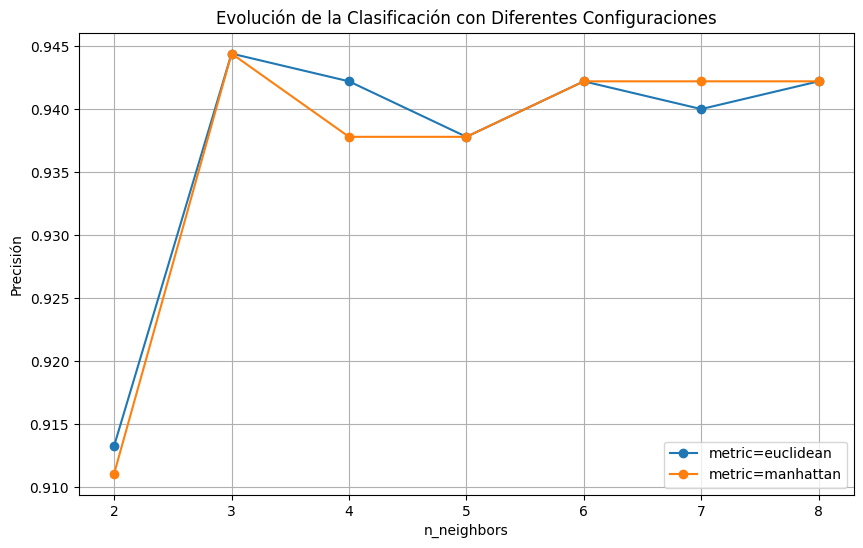

In [15]:
# Obtener valores únicos de métricas para graficar
metric_values = df_results['metric'].unique()

# Graficar la evolución de la clasificación para cada métrica
plt.figure(figsize=(10, 6))
for metric in metric_values:
    df_metric = df_results[df_results['metric'] == metric]
    plt.plot(df_metric['n_neighbors'], df_metric['Precisión'], marker='o', label=f'metric={metric}')

# Configurar etiquetas y leyendas
plt.xlabel('n_neighbors')
plt.ylabel('Precisión')
plt.title('Evolución de la Clasificación con Diferentes Configuraciones')
plt.legend()
plt.grid(True)
plt.show()


Selecionamos la distancia euclidea con distnacia euclidea, para evitar datos demasiado sesgados y así tener un poco de flexibilidad.

**Utilizar el clasificador para saber que ocurre con los datos de un del dataset de test “pacientes_test.csv”que obtendremos del dataset proporcionado.**

In [16]:
#clasificador KNN con la mejor configuración
knn_classifier = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

# Entrenar el modelo KNN con todo el conjunto de entrenamiento
# Suponiendo que X_train son tus características de entrenamiento y y_train son las etiquetas correspondientes
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [18]:
#predicciones del modelo KNN en el conjunto de datos de prueba
predictions = knn_classifier.predict(X_test)

# Convertir las etiquetas reales a una lista
y_test_list = y_test.tolist()


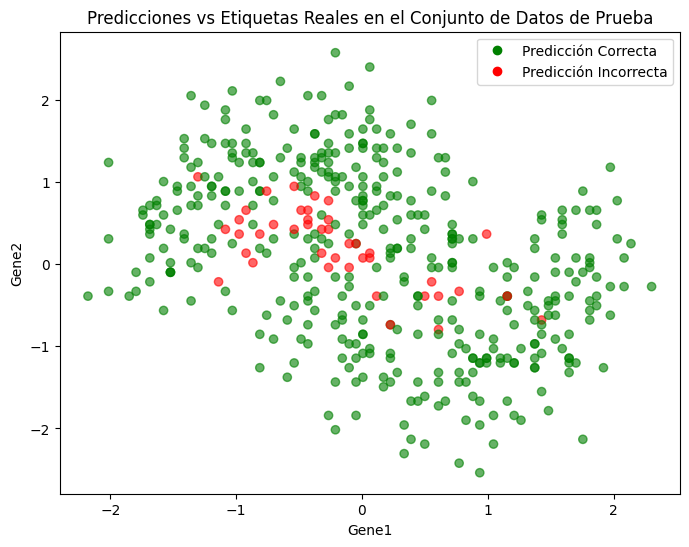

In [19]:
# Crear una lista de colores para cada punto en función de la precisión de la predicción
colors = ['green' if pred == true_label else 'red' for pred, true_label in zip(predictions, y_test_list)]

# Crear el gráfico de dispersión con las predicciones y etiquetas reales del conjunto de prueba
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=colors, alpha=0.6)
plt.xlabel('Gene1')
plt.ylabel('Gene2')
plt.title('Predicciones vs Etiquetas Reales en el Conjunto de Datos de Prueba')

# Agregar leyenda para las clases
correct_label = plt.Line2D([0, 1], [0, 0], color='green', marker='o', linestyle='', label='Predicción Correcta')
incorrect_label = plt.Line2D([0, 1], [0, 0], color='red', marker='o', linestyle='', label='Predicción Incorrecta')
plt.legend(handles=[correct_label, incorrect_label])

plt.show()


In [20]:
from sklearn.metrics import accuracy_score

# Obtener predicciones del modelo KNN en el conjunto de datos de prueba
predictions = knn_classifier.predict(X_test)

# Convertir las etiquetas reales a una lista
y_test_list = y_test.tolist()

# Calcular la precisión (porcentaje de predicciones correctas)
accuracy = accuracy_score(y_test_list, predictions)
print(f"Precisión del modelo KNN en el conjunto de prueba: {accuracy:.4f}")


Precisión del modelo KNN en el conjunto de prueba: 0.9089


Ya hemos visto que con estas métricas obtenemos una precisión del 94.4%, pero ahora pasamos a anlizar los datos de test. Realizamos la predición con el clasificador y al graficar los resultados observamos que los puntos que más error tienen son los que están situados entre ambos grupos, ya que como observamos al principio eran dos grupos bastante diferenciados. El porcentaje de aciertos es del 90.89%, obviamente el porcentaje es menor que en el entrenamiento.